In [1]:
cd D:\ArdenDocs\Modules\Data Handling and Decision Making\Assignment\Dataset

D:\ArdenDocs\Modules\Data Handling and Decision Making\Assignment\Dataset


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.offline as py
py.init_notebook_mode(connected=True)

from math import sqrt
from pprint import pprint
from IPython.display import display
from scipy.spatial import ConvexHull
from matplotlib.pyplot import figure

from sklearn.preprocessing import LabelEncoder as label_encoder
from sklearn import preprocessing  
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV, cross_val_predict
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split,RandomizedSearchCV


import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [3]:
df = pd.read_csv("Airfare.csv")

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df.shape

(10683, 11)

In [6]:
print(df.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [7]:
df=df.dropna()

In [8]:
print(df.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


In [9]:
df.shape

(10682, 11)

In [10]:
df.duplicated().sum()

220

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(10462, 11)

## Extracting day,month,year,weekday from Date of Journey

In [14]:
df['Journey_Day'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.day
df['Journey_Month'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.month
df['weekday']= pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.weekday

In [15]:
df.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)

In [16]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'weekday'],
      dtype='object')

In [17]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,6
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,4


## Converting duration into minutes

In [18]:
def duration(test):
    test = test.strip()
    total=test.split(' ')
    to=total[0]
    hrs=(int)(to[:-1])*60
    if((len(total))==2):
        mint=(int)(total[1][:-1])
        hrs=hrs+mint
    test=str(hrs)
    return test
df['Duration']=df['Duration'].apply(duration)

In [19]:
df['Duration'].nunique()

367

## Extracting whether its a morning,evening,night or afternoon flight from departure time & arrival time of the flight

In [20]:
def deparrtime(x):
    x=x.strip()
    tt=(int)(x.split(':')[0])
    if(tt>=16 and tt<21):
        x='Evening'
    elif(tt>=21 or tt<5):
        x='Night'
    elif(tt>=5 and tt<11):
        x='Morning'
    elif(tt>=11 and tt<16):
        x='Afternoon'
    return x
df['Dep_Time']=df['Dep_Time'].apply(deparrtime)
df['Arrival_Time']=df['Arrival_Time'].apply(deparrtime)

## Converting total_stops to 0,1,2,3 and so on..

In [21]:
def stops(x):
    if(x=='non-stop'):
        x=str(0)
    else:
        x.strip()
        stps=x.split(' ')[0]
        x=stps
    return x
df['Total_Stops']=df['Total_Stops'].apply(stops)

In [22]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,BLR → DEL,Night,Night,170,0,No info,3897,24,3,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,Morning,Afternoon,445,2,No info,7662,1,5,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,Morning,Night,1140,2,No info,13882,9,6,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,Evening,Night,325,1,No info,6218,12,5,6
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,Evening,Night,285,1,No info,13302,1,3,4


In [23]:
pd.options.mode.chained_assignment = None 
for i in range(df.shape[0]):
    if(df.iloc[i]['Additional_Info']=='No info'):
        df.iloc[i]['Additional_Info']='No Info' 

In [24]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,BLR → DEL,Night,Night,170,0,No info,3897,24,3,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,Morning,Afternoon,445,2,No info,7662,1,5,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,Morning,Night,1140,2,No info,13882,9,6,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,Evening,Night,325,1,No info,6218,12,5,6
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,Evening,Night,285,1,No info,13302,1,3,4


In [25]:
df=df.drop(['Route'], axis=1) #we don't need it as we already have total_stops

In [26]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,Night,Night,170,0,No info,3897,24,3,6
1,Air India,Kolkata,Banglore,Morning,Afternoon,445,2,No info,7662,1,5,2
2,Jet Airways,Delhi,Cochin,Morning,Night,1140,2,No info,13882,9,6,6
3,IndiGo,Kolkata,Banglore,Evening,Night,325,1,No info,6218,12,5,6
4,IndiGo,Banglore,New Delhi,Evening,Night,285,1,No info,13302,1,3,4


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Source           10462 non-null  object
 2   Destination      10462 non-null  object
 3   Dep_Time         10462 non-null  object
 4   Arrival_Time     10462 non-null  object
 5   Duration         10462 non-null  object
 6   Total_Stops      10462 non-null  object
 7   Additional_Info  10462 non-null  object
 8   Price            10462 non-null  int64 
 9   Journey_Day      10462 non-null  int32 
 10  Journey_Month    10462 non-null  int32 
 11  weekday          10462 non-null  int32 
dtypes: int32(3), int64(1), object(8)
memory usage: 939.9+ KB


## changing data types accordingly

In [28]:
df["Duration"] = df["Duration"].astype(int)
df["Journey_Day"] = df["Journey_Day"].astype(object)
df["Journey_Month"] = df["Journey_Month"].astype(object)
df["weekday"] = df["weekday"].astype(object)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Source           10462 non-null  object
 2   Destination      10462 non-null  object
 3   Dep_Time         10462 non-null  object
 4   Arrival_Time     10462 non-null  object
 5   Duration         10462 non-null  int32 
 6   Total_Stops      10462 non-null  object
 7   Additional_Info  10462 non-null  object
 8   Price            10462 non-null  int64 
 9   Journey_Day      10462 non-null  object
 10  Journey_Month    10462 non-null  object
 11  weekday          10462 non-null  object
dtypes: int32(1), int64(1), object(10)
memory usage: 1021.7+ KB


In [30]:
df1 =df.copy() 

In [31]:
print(df1[ 'Journey_Month' ].unique())

[3 5 6 4]


In [32]:
df1["Journey_Month"]=df1["Journey_Month"].replace({3:"March",4:"April",5:"May",6:"June"}) #assigning month names


In [33]:
df1.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,Night,Night,170,0,No info,3897,24,March,6
1,Air India,Kolkata,Banglore,Morning,Afternoon,445,2,No info,7662,1,May,2
2,Jet Airways,Delhi,Cochin,Morning,Night,1140,2,No info,13882,9,June,6
3,IndiGo,Kolkata,Banglore,Evening,Night,325,1,No info,6218,12,May,6
4,IndiGo,Banglore,New Delhi,Evening,Night,285,1,No info,13302,1,March,4


In [34]:
df1["Journey_Month"]=df1["Journey_Month"].astype(object)

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Source           10462 non-null  object
 2   Destination      10462 non-null  object
 3   Dep_Time         10462 non-null  object
 4   Arrival_Time     10462 non-null  object
 5   Duration         10462 non-null  int32 
 6   Total_Stops      10462 non-null  object
 7   Additional_Info  10462 non-null  object
 8   Price            10462 non-null  int64 
 9   Journey_Day      10462 non-null  object
 10  Journey_Month    10462 non-null  object
 11  weekday          10462 non-null  object
dtypes: int32(1), int64(1), object(10)
memory usage: 1021.7+ KB


# EDA

Text(0.5, 0, 'Month of booking')

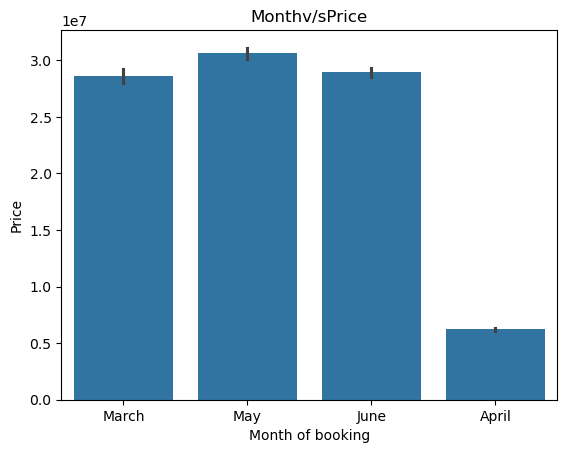

In [36]:
#Journey month v/s total fare
v1=sns.barplot(x='Journey_Month', y='Price', data=df1,estimator=sum)
v1.set_title('Monthv/sPrice')
v1.set_ylabel('Price')
v1.set_xlabel('Month of booking')
#v1.set_xticklabels(v1.get_xticklabels(), rotation=80)

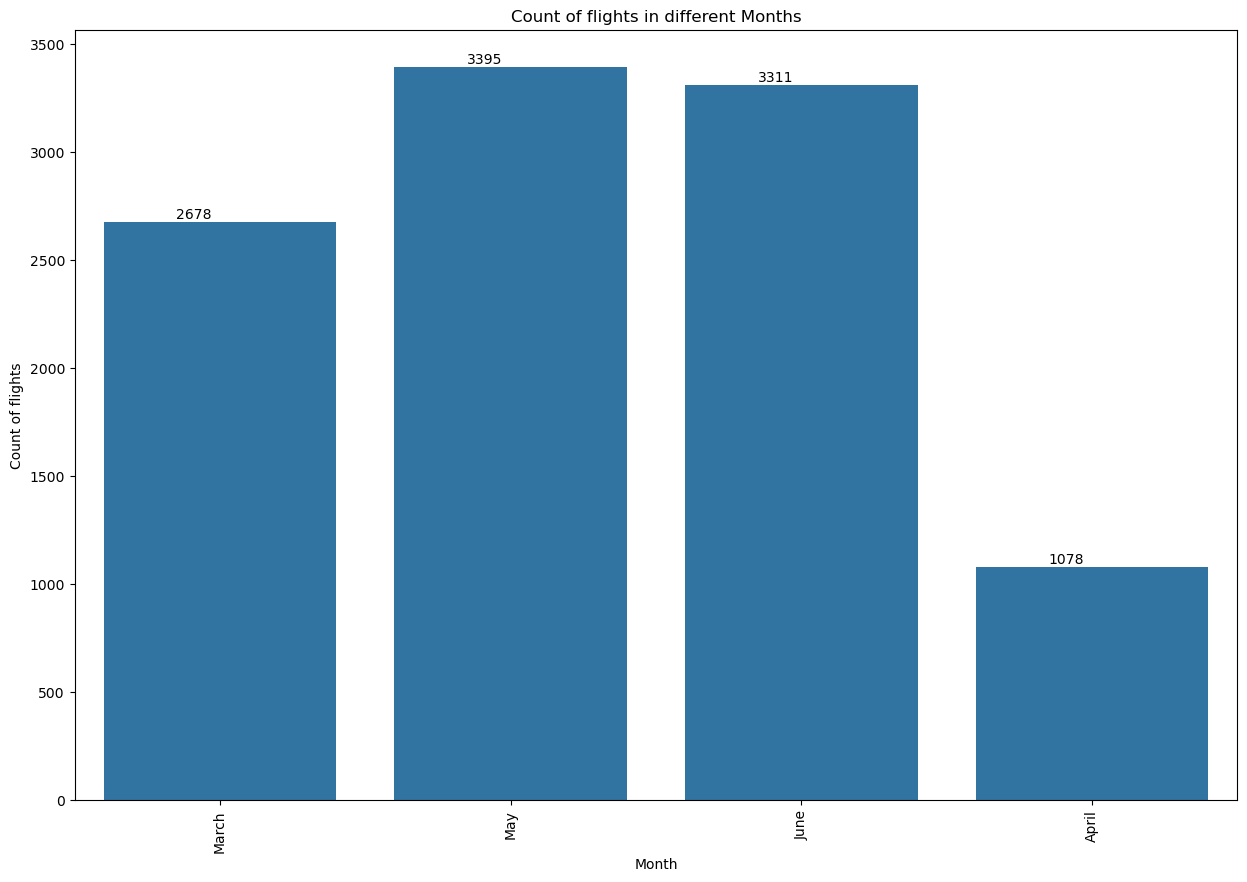

In [37]:
#Count of flights v/s Airline
plt.figure(figsize = (15, 10))
plt.title('Count of flights in different Months')
ax=sns.countplot(x = 'Journey_Month', data =df1)
plt.xlabel('Month')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

In [38]:
#count of flights per month
top_month=df1.Journey_Month.value_counts().head(10)
top_month

Journey_Month
May      3395
June     3311
March    2678
April    1078
Name: count, dtype: int64

Analysis :¶
We see that the total count of flight is maximum towards the month-May which can also be concluded from the above bar plot which shows that the sum of fare is maximum in May.
This can be due to : Summer vacations in the month of may for schools/colleges, hence most families are also generally going for vacations around this time.
The count of flights is lowest on the month of April, this can be because : Schools,colleges have their final exams around this time, offices are mostly busy in the month of April as it is the end of Quarter 1.

In [39]:
monthly_avg=df1.groupby(['Journey_Month']).agg({'Price':np.mean}).reset_index()

<Axes: xlabel='Journey_Month'>

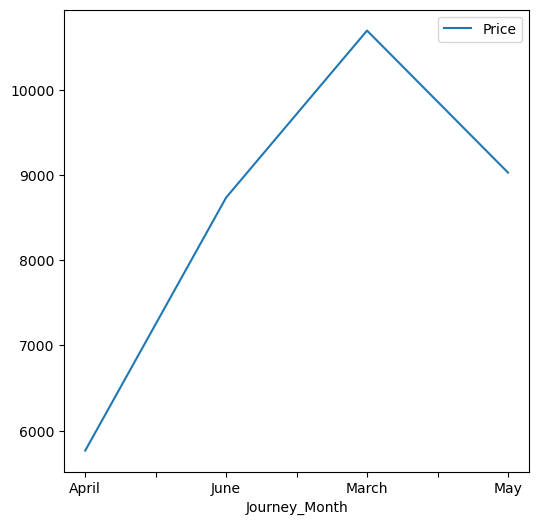

In [40]:
#Journey month v/s Averagefare
monthly_avg.plot(x='Journey_Month',y='Price',figsize=(6,6))

Analysis :¶
We see that the average fare price is highest the month of March , this can be because people usually book the fights 2-3 months prior to their date of journey which leads to higher demand and hence higher fare prices.(since the count of tickets booked for travelling in May is the most, prior bookings are done in March)

<function matplotlib.pyplot.show(close=None, block=None)>

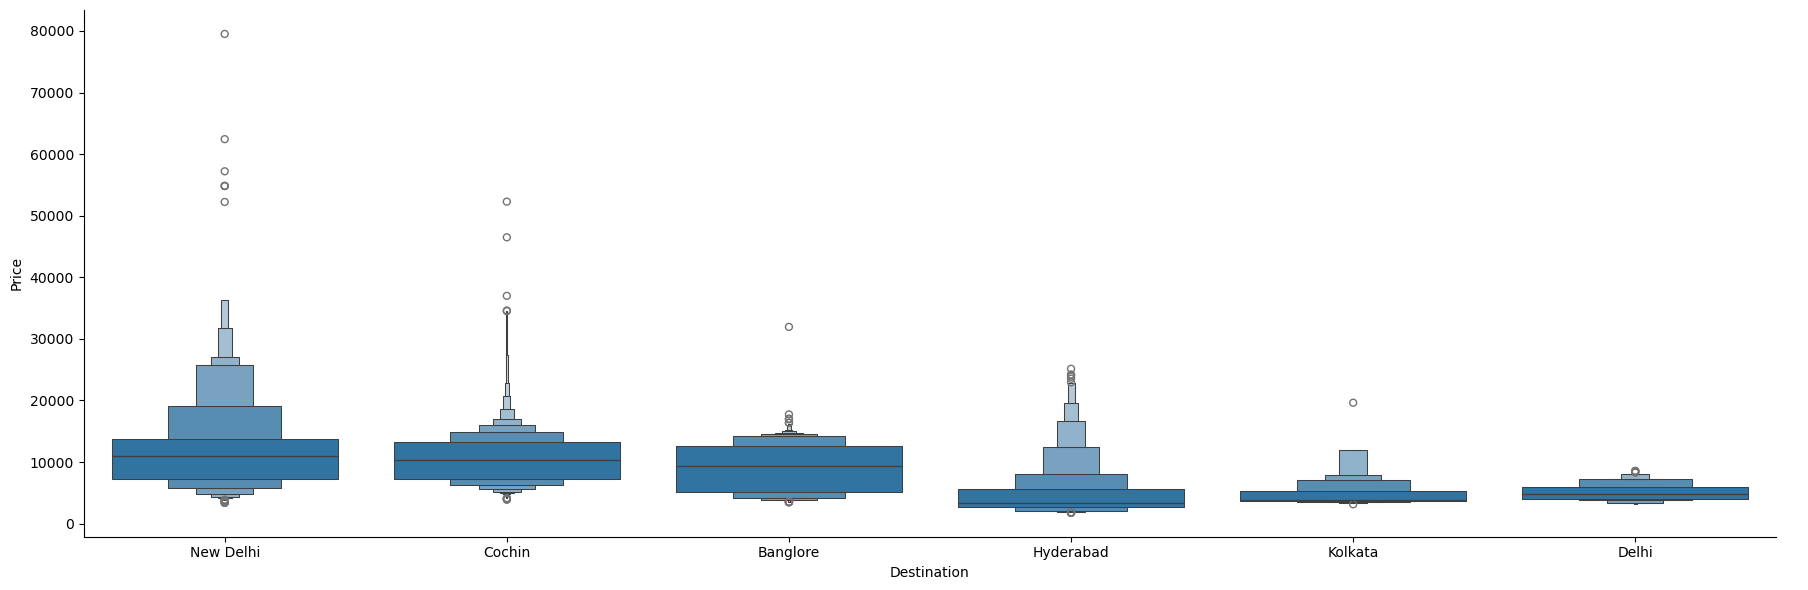

In [41]:
# Destination vs AveragePrice
sns.catplot(y='Price',x='Destination',data= df1.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

Analysis :¶
The airfare price range in Delhi & New Delhi is the maximum, this can be due to: Jet fuel prices in Delhi had increased in the year of 2018 by 26.4%, it is also the National Capital, political seat of power and a highly visited place for vacations(same for bangalore & cochin)
The same reasoning can be given for higher price range in delhi as the source of the flight.

<function matplotlib.pyplot.show(close=None, block=None)>

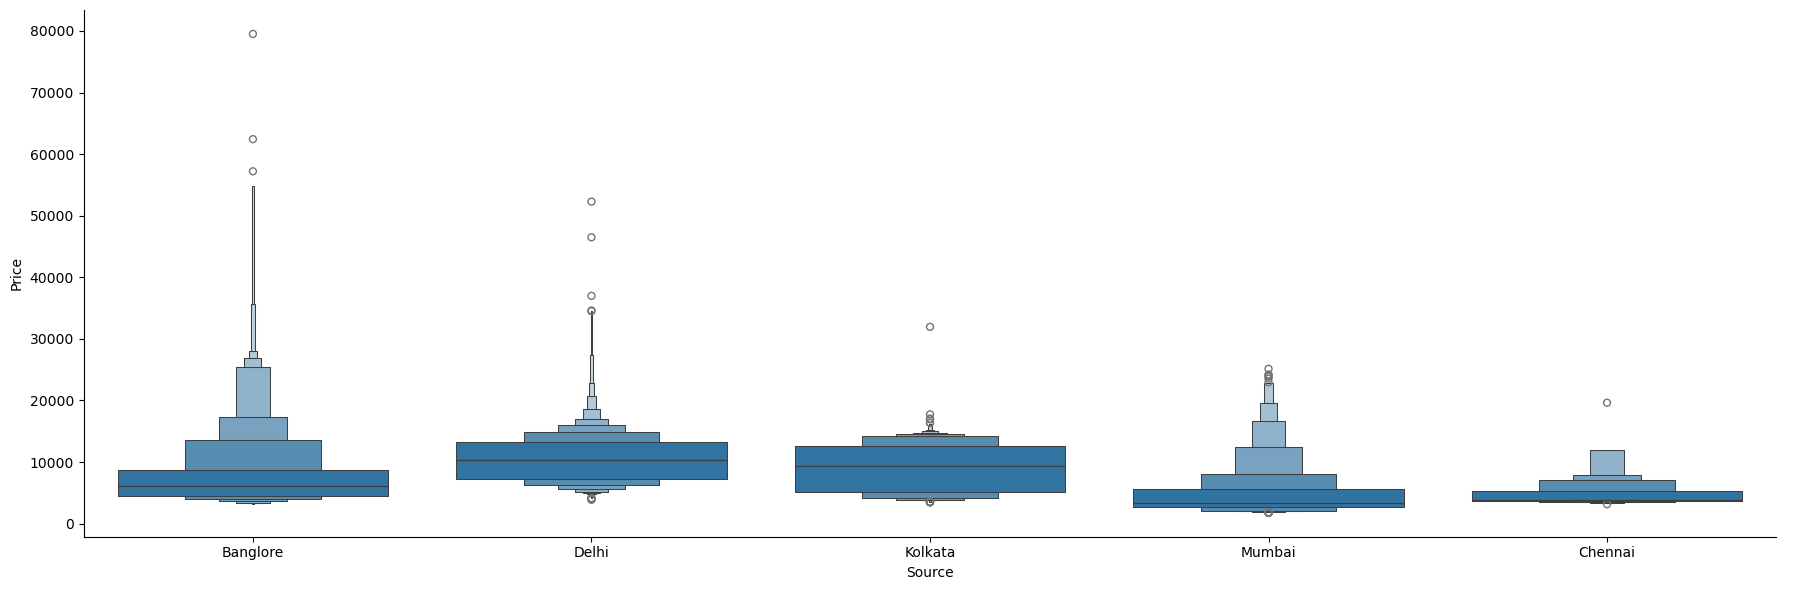

In [42]:
# Source vs AveragePrice
sns.catplot(y='Price',x='Source',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

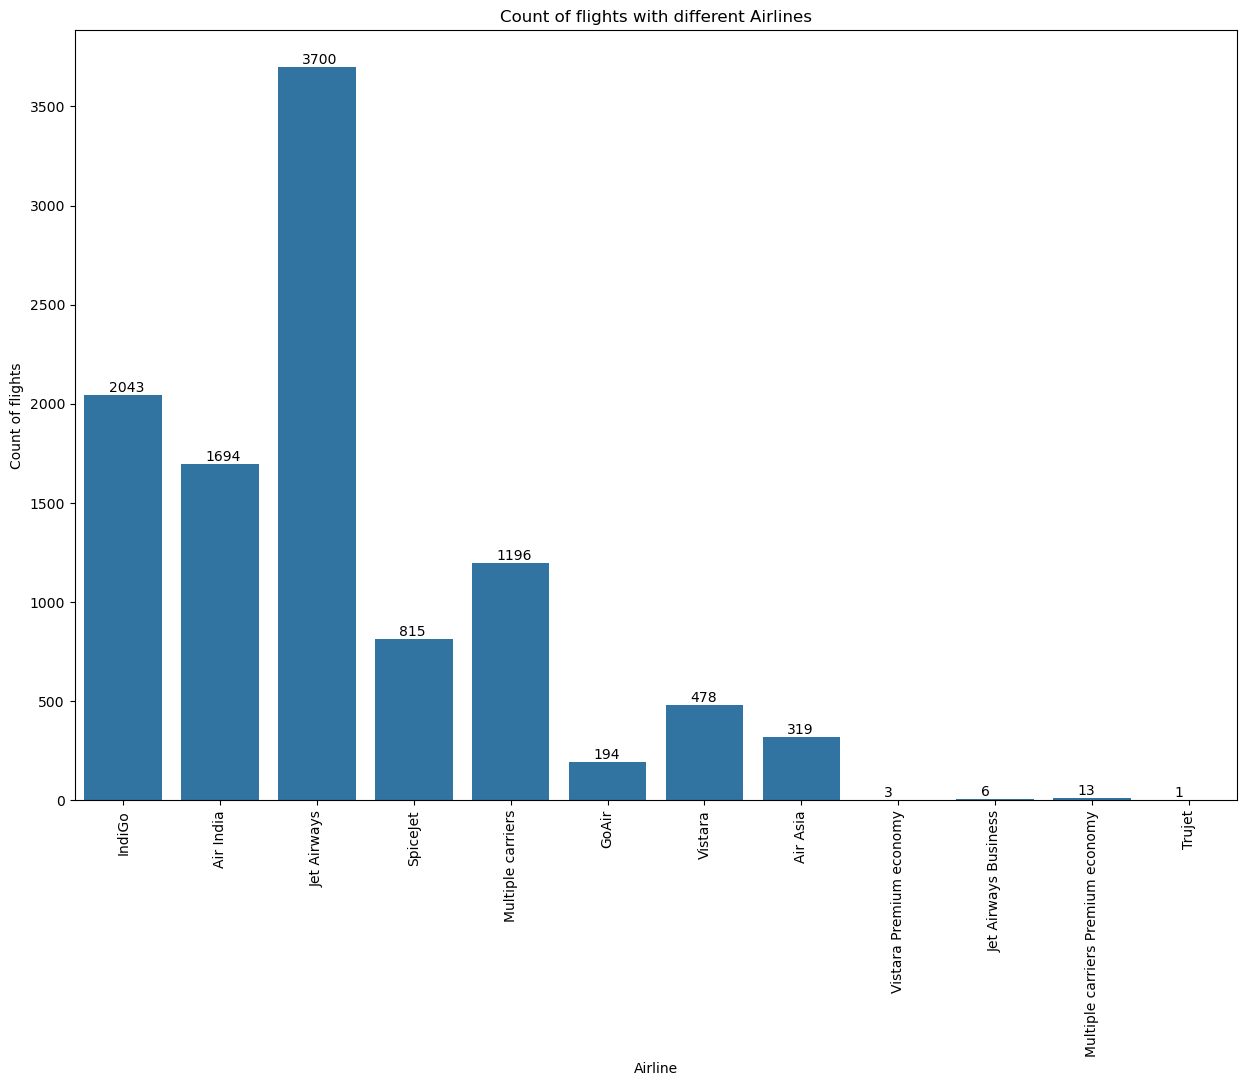

In [43]:
#Count of flights v/s Airline
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

Analysis :¶
from the diagram below we can see that jet airways Business have the highest price
apart from the first airline almost all are having similar median

<function matplotlib.pyplot.show(close=None, block=None)>

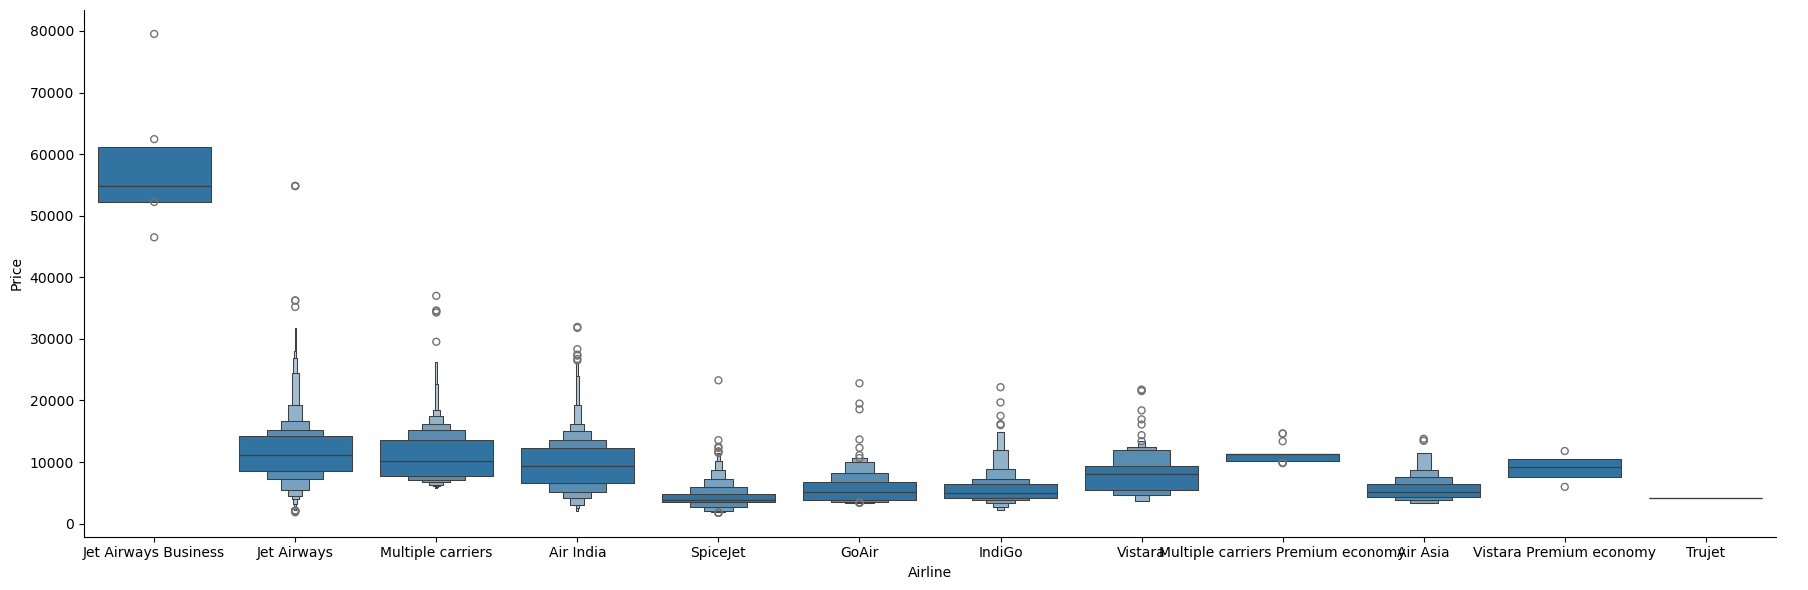

In [44]:
# Airline vs AveragePrice
sns.catplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

Analysis :¶
Jet airways and Air India are full service airlines are and always highly priced due to various amenities they provide. Low-cost carriers like indigo and spicejet have a lower and similar fare range .

<Axes: xlabel='Duration', ylabel='Price'>

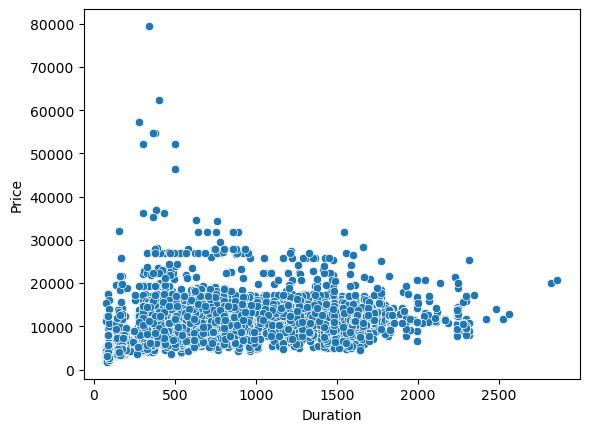

In [45]:
#duration v/s AveragePrice
sns.scatterplot(data=df, x='Duration', y='Price')

Analysis :¶
We know that duration( or distance) plays a major role in affecting air ticket prices but we see no such pattern here, as there must be there are other significant factors affecting air fare like type of airline, destination of flight, date of journey of flight(higher if collides with a public holiday)

[Text(0, 0, 'Night'),
 Text(1, 0, 'Morning'),
 Text(2, 0, 'Evening'),
 Text(3, 0, 'Afternoon')]

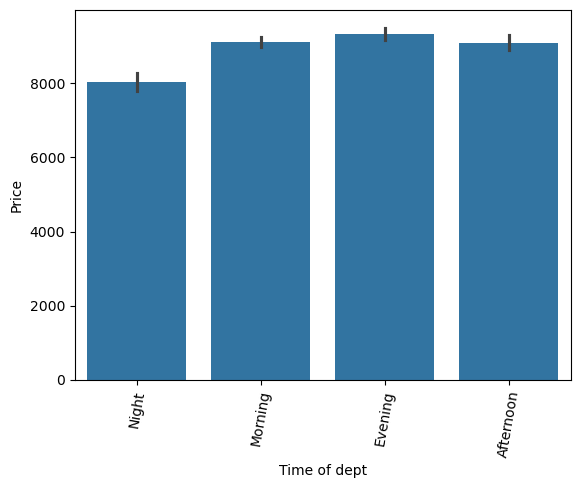

In [46]:
#Deptarure time v/s AveragePrice
v2=sns.barplot(x='Dep_Time', y='Price', data=df)
v2.set_ylabel('Price')
v2.set_xlabel('Time of dept')
v2.set_xticklabels(v2.get_xticklabels(), rotation=80)

In [47]:
# time of departure v/s count of flights
top_time=df.Dep_Time.value_counts().head(10)
top_time

Dep_Time
Morning      4227
Evening      2784
Afternoon    1992
Night        1459
Name: count, dtype: int64

Analysis:¶
Early Morning flights are always cheaper and so are midnight flight prices.
Evening flight fares are expensive due to more demand and is the most convenient time to tarvel for most people.

[Text(0, 0, 'Night'),
 Text(1, 0, 'Afternoon'),
 Text(2, 0, 'Morning'),
 Text(3, 0, 'Evening')]

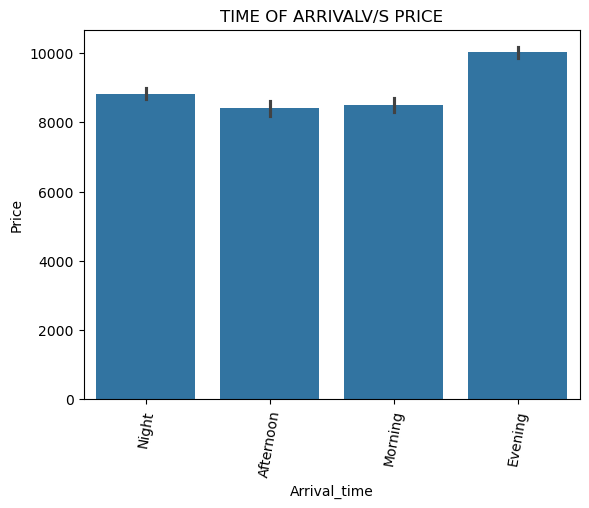

In [48]:
#TIME OF ARRIVAL V/S average price
v3=sns.barplot(x='Arrival_Time', y='Price', data=df)
v3.set_title('TIME OF ARRIVALV/S PRICE')
v3.set_ylabel('Price')
v3.set_xlabel('Arrival_time')
v3.set_xticklabels(v3.get_xticklabels(), rotation=80)

[Text(0, 0, '0'),
 Text(1, 0, '2'),
 Text(2, 0, '1'),
 Text(3, 0, '3'),
 Text(4, 0, '4')]

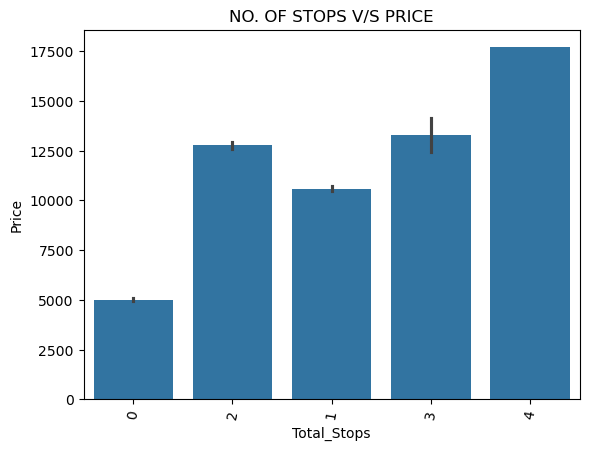

In [49]:
#total stops v/s average price
v4=sns.barplot(x='Total_Stops', y='Price', data=df)
v4.set_title('NO. OF STOPS V/S PRICE')
v4.set_ylabel('Price')
v4.set_xlabel('Total_Stops')
v4.set_xticklabels(v4.get_xticklabels(), rotation=80)

Analysis :¶
As a direct/non-stop flight is accounting for fare of only one flight for a trip, its average fair is the least. As the no. of stops/layovers increase, the fare price goes up accounting for no. of flights and due to other resources being used up for the same.

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6')]

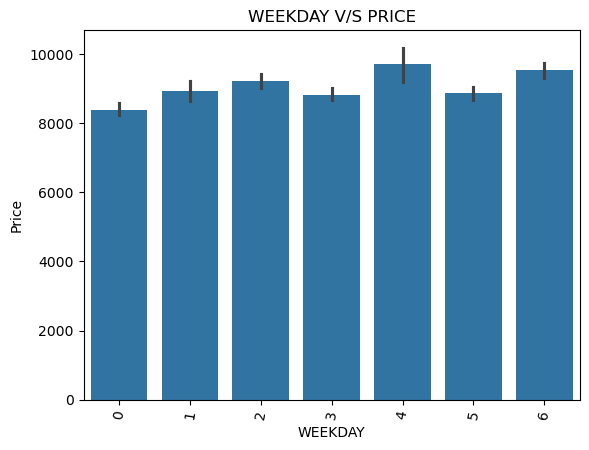

In [50]:
#WEEKDAY V/S average price
v4=sns.barplot(x='weekday', y='Price', data=df)
v4.set_title('WEEKDAY V/S PRICE')
v4.set_ylabel('Price')
v4.set_xlabel('WEEKDAY')
v4.set_xticklabels(v4.get_xticklabels(), rotation=80)

Analysis :¶
We see that prices are highest on a friday, that may be because this is when airlines start raising prices to make up for the lower prices before and also because weekdays are off for most people so they are mostly travelling to or travelling back.

In [51]:
df["Journey_Day"].unique()

array([24, 1, 9, 12, 27, 18, 3, 15, 6, 21], dtype=object)

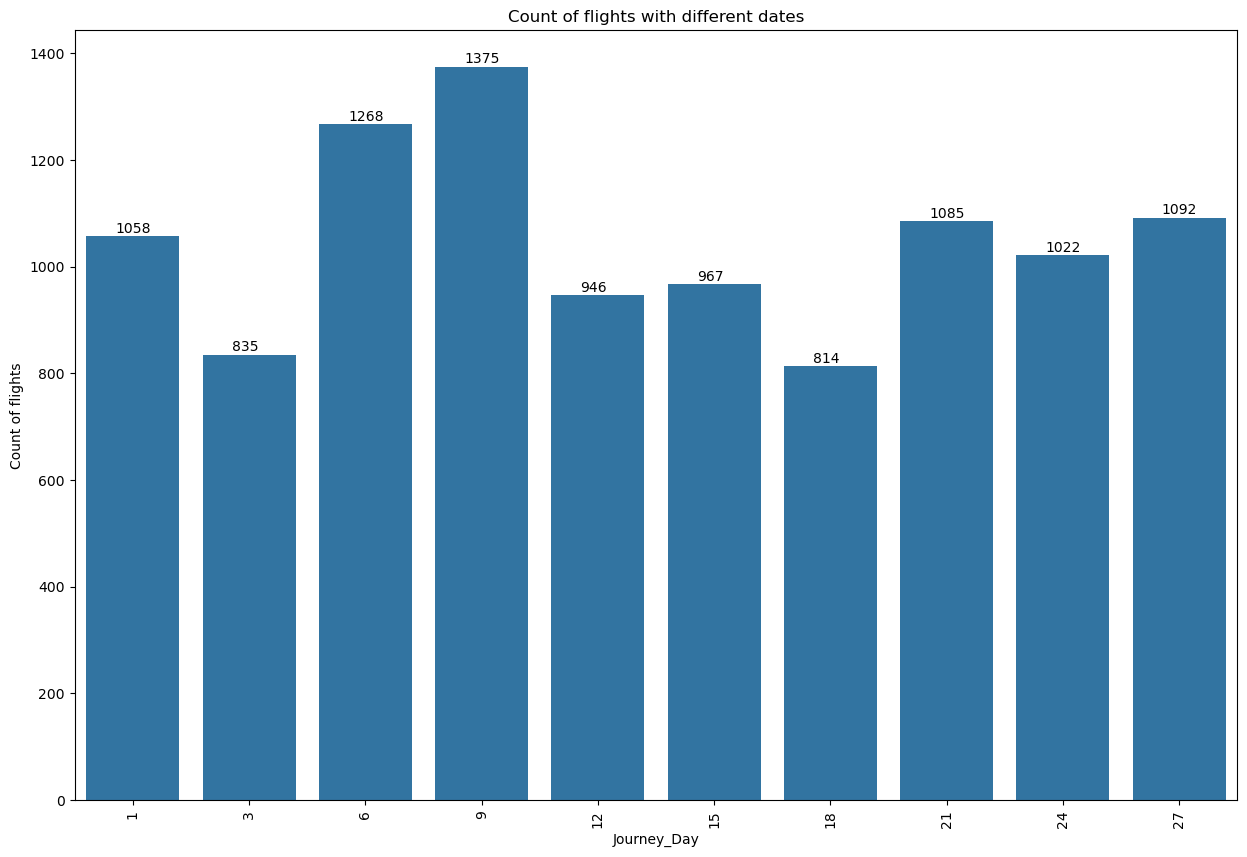

In [52]:
#Count of flights with different dates
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different dates')
ax=sns.countplot(x = 'Journey_Day', data =df)
plt.xlabel('Journey_Day')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

[Text(0, 0, '1'),
 Text(1, 0, '3'),
 Text(2, 0, '6'),
 Text(3, 0, '9'),
 Text(4, 0, '12'),
 Text(5, 0, '15'),
 Text(6, 0, '18'),
 Text(7, 0, '21'),
 Text(8, 0, '24'),
 Text(9, 0, '27')]

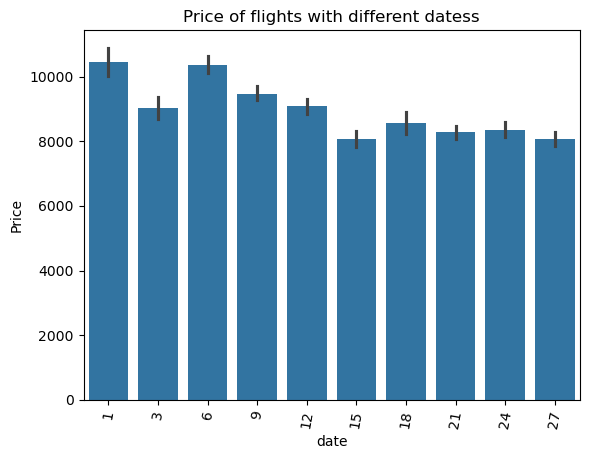

In [53]:
#Journey_Day v/s Average price
v5=sns.barplot(x='Journey_Day', y='Price', data=df)
v5.set_title('Price of flights with different datess')
v5.set_ylabel('Price')
v5.set_xlabel('date')
v5.set_xticklabels(v5.get_xticklabels(), rotation=80)

Analysis :¶
It looks like that there's a trend in the air fare when compared to the day of respective months, prices are higher in the start of month but this is not a trend if you see from the broader perspective as this might be due to various reasons. For eg. the date of Journey is 10th March and people are booking towards 5th March or so, this will lead to higher flight prices.(Prices increase as near you date of booking is to the date of journey). So flight prices don't follow any particular pattern towards any time of the month.

In [54]:
print(df.dtypes)

Airline            object
Source             object
Destination        object
Dep_Time           object
Arrival_Time       object
Duration            int32
Total_Stops        object
Additional_Info    object
Price               int64
Journey_Day        object
Journey_Month      object
weekday            object
dtype: object


# Outlier detection

(10462, 12)
75
2860


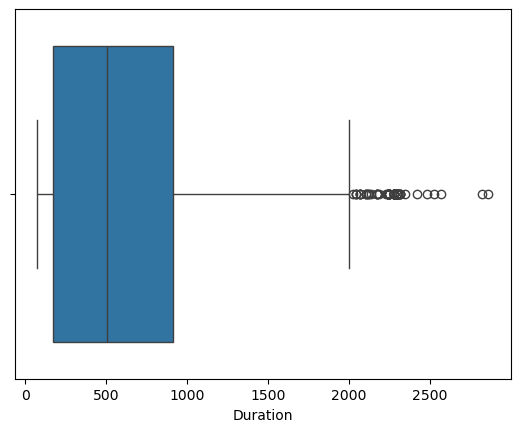

In [55]:
sns.boxplot(x= df['Duration'])
print(df.shape)
print(df['Duration'].min())
print(df['Duration'].max())
plt.savefig("Outliers.png", dpi = 1000)

In [56]:
ncol=["Duration"]          
for i in ncol:
    q75, q25 = np.percentile(df.loc[:,i], [75 ,25])
    iqr = q75 - q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(iqr,min,max)
    df = df.drop(df[df.loc[:,i] <= min].index)
    df = df.drop(df[df.loc[:,i] >= max].index)

740.0 -940.0 2020.0


In [57]:
print(df['Duration'].min())
print(df['Duration'].max())
df.shape

75
2000


(10387, 12)

# Correlation Heatmap

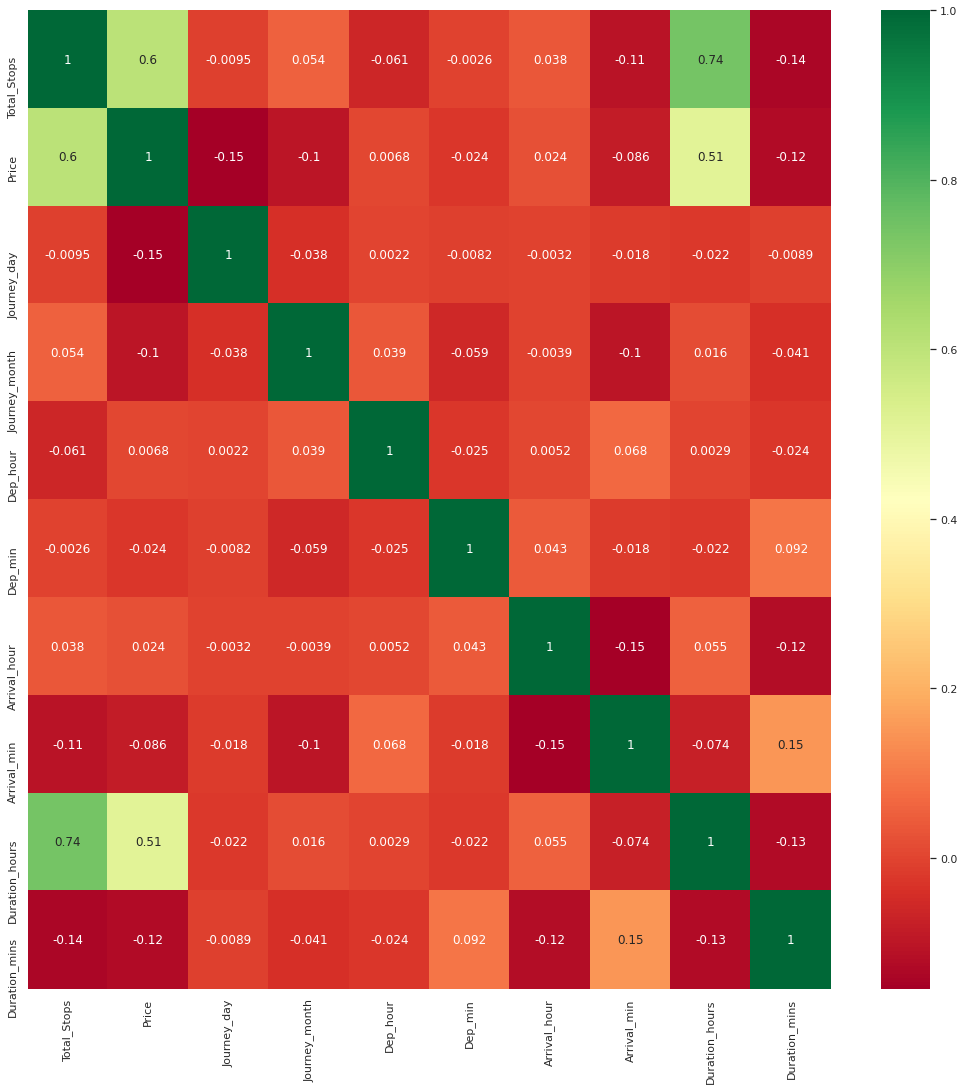

In [58]:
from PIL import Image 
from IPython.display import display
img = Image.open('CorrHeatmap.png')
display(img)

In [59]:
df2 = df.copy()

In [60]:
# Import label encoder 
colnames = list(df2.columns)
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
for col in colnames:
    if df2[col].dtype==object:
        df2[col]= label_encoder.fit_transform(df2[col]) 

In [61]:
df2.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,3,0,5,3,3,170,0,8,3897,8,0,6
1,1,3,0,2,0,445,2,8,7662,0,2,2
2,4,2,1,2,3,1140,2,8,13882,3,3,6
3,3,3,0,1,3,325,1,8,6218,4,2,6
4,3,0,5,1,3,285,1,8,13302,0,0,4


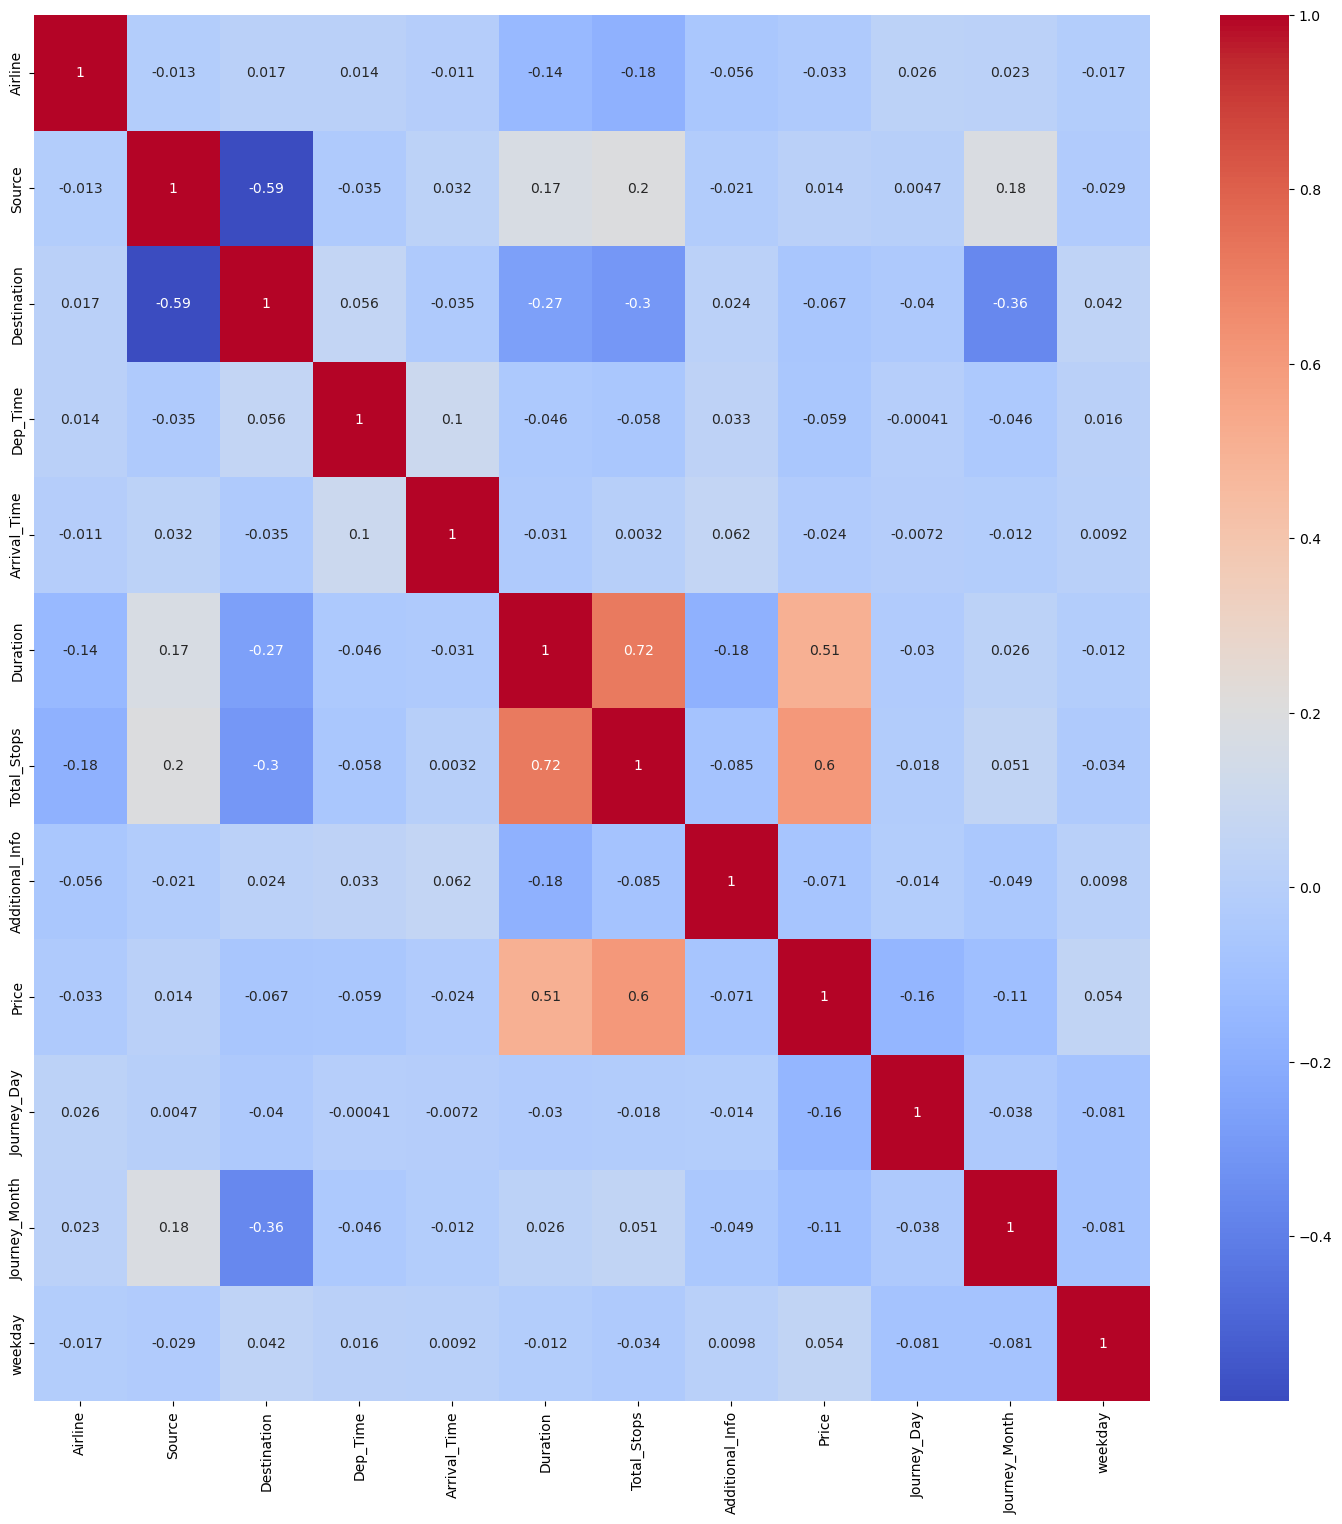

In [62]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(df2.corr(), annot = True, cmap = "coolwarm")
plt.savefig("CorrMap.png", dpi = 1000)
plt.show()

# Label encoding

In [63]:
df3 = df.copy()

In [64]:
from sklearn.preprocessing import LabelEncoder

mask = df3.dtypes == np.object_
Category_column = df3.columns[mask]
    
le = LabelEncoder()
    
for category in Category_column:
    le.fit(df3[category].drop_duplicates())
    df3[category]=le.transform(df3[category])

df3

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,3,0,5,3,3,170,0,8,3897,8,0,6
1,1,3,0,2,0,445,2,8,7662,0,2,2
2,4,2,1,2,3,1140,2,8,13882,3,3,6
3,3,3,0,1,3,325,1,8,6218,4,2,6
4,3,0,5,1,3,285,1,8,13302,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,1,3,150,0,8,4107,3,1,1
10679,1,3,0,1,3,155,0,8,4145,9,1,5
10680,4,0,2,2,0,180,0,8,7229,9,1,5
10681,10,0,5,0,0,160,0,8,12648,0,0,4


# Regression

In [65]:
X = df3.drop(["Price"], axis = 1)
y = df3.Price

# Linear Regression

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [67]:
# initialize the model
model = LinearRegression()

In [68]:
# train the model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

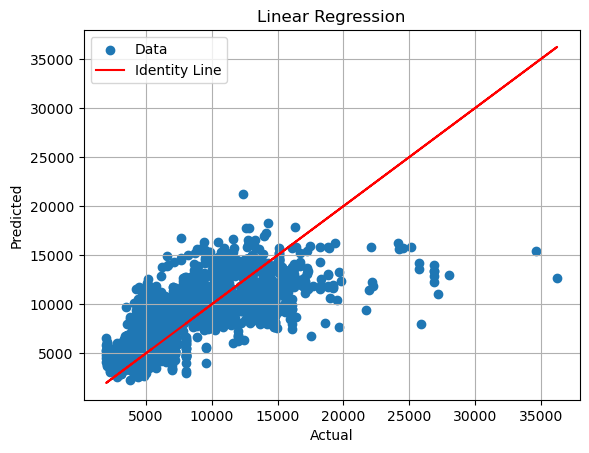

In [69]:
#Visualize MLR-trained model
plt.scatter(y_test, y_pred,label='Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.title("Linear Regression")
# Plotting the identity line
plt.plot(y_test, y_test, color='red',label='Identity Line')
plt.grid()
plt.legend(loc='best')
plt.show()

In [70]:
#Evaluation of MLR Model
print("R^2 on training data ",model.score(X_train, y_train))
print("R^2 on testing data ",model.score(X_test,y_test))

R^2 on training data  0.4282237503494595
R^2 on testing data  0.4758460051358132


In [71]:
kf = KFold(shuffle = True, random_state = True, n_splits = 3)

In [72]:
estimator = Pipeline([("Scaler", StandardScaler()), ("Polynomial_Features", PolynomialFeatures()), ("Linear_Regression", LinearRegression())])

params = {"Polynomial_Features__degree":range(3), }

grid = GridSearchCV(estimator, params, cv = kf)
grid.fit(X,y)
grid.best_score_ , grid.best_params_

(0.6032473979454248, {'Polynomial_Features__degree': 2})

In [73]:
Vanilla_Regression = Pipeline([("Scaler", StandardScaler()), ("Polynomial_Features", PolynomialFeatures()), ("Linear_Regression", LinearRegression())])
Vanilla_Regression.fit(X,y)
print(f"The accuracy is : {round(Vanilla_Regression.score(X,y)*100,2)} %")

The accuracy is : 61.24 %


Ridge

In [74]:
estimator = Pipeline([("Scaler", StandardScaler()), ("Polynomial_Features", PolynomialFeatures()), ("Ridge_Regression", Ridge())])

params = {"Polynomial_Features__degree": [1,2,3],
          "Ridge_Regression__alpha": np.geomspace(0.01,30,20),
          }

grid = GridSearchCV(estimator, params, cv = kf)
grid.fit(X,y)
grid.best_score_ , grid.best_params_

(0.6423547161595815,
 {'Polynomial_Features__degree': 3, 'Ridge_Regression__alpha': 30.0})

In [75]:
Ridge_Regression = Pipeline([("Scaler", StandardScaler()), ("make_higher_degree", PolynomialFeatures()), ("Ridge_Regression", Ridge())])
Ridge_Regression.fit(X,y)
print(f"The accuracy is : {round(Ridge_Regression.score(X,y)*100,2)} %")

The accuracy is : 61.13 %


--------------------------
Corr_Linear Regression: 0.691
MAE_Linear Regression:  2400.891
MSE_Linear Regression:  9774384.048
RMSE_Linear Regression: 3126.401
R2_Linear Regression:   0.476
--------------------------
--------------------------
Corr_Random Forest Regressor: 0.940
MAE_Random Forest Regressor:  764.383
MSE_Random Forest Regressor:  2161193.680
RMSE_Random Forest Regressor: 1470.100
R2_Random Forest Regressor:   0.884
--------------------------
--------------------------
Corr_XGBoost Regressor: 0.947
MAE_XGBoost Regressor:  832.244
MSE_XGBoost Regressor:  1945370.419
RMSE_XGBoost Regressor: 1394.765
R2_XGBoost Regressor:   0.896
--------------------------
--------------------------
Corr_Decision Tree: 0.900
MAE_Decision Tree:  868.886
MSE_Decision Tree:  4088873.586
RMSE_Decision Tree: 2022.096
R2_Decision Tree:   0.781
--------------------------
--------------------------
Corr_Ridge Regression: 0.691
MAE_Ridge Regression:  2400.892
MSE_Ridge Regression:  9774517.445
RMSE_R

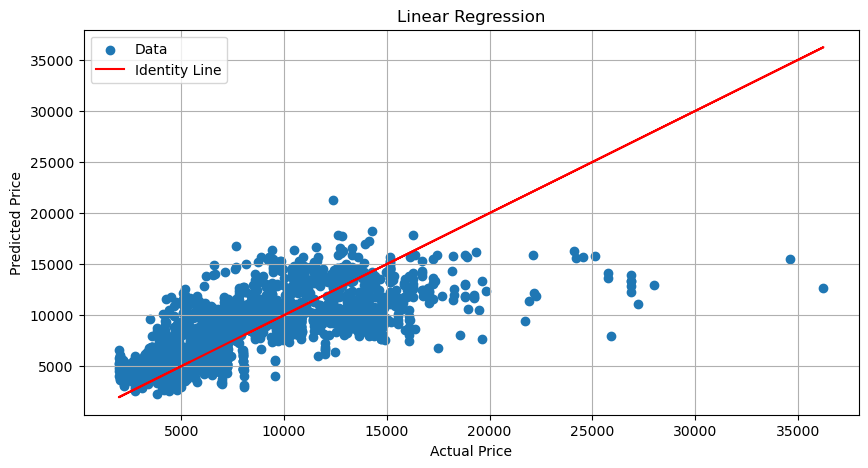

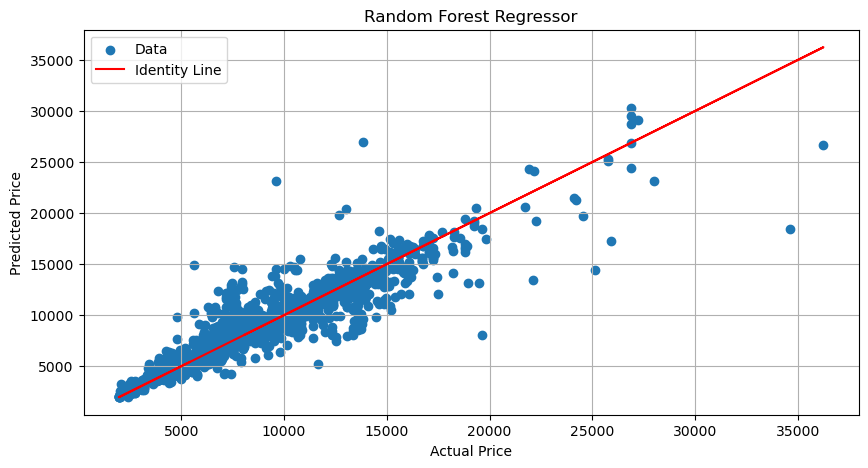

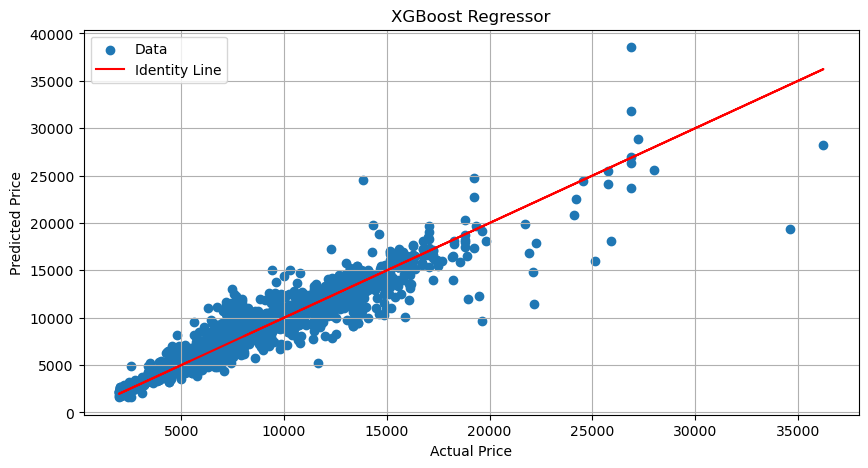

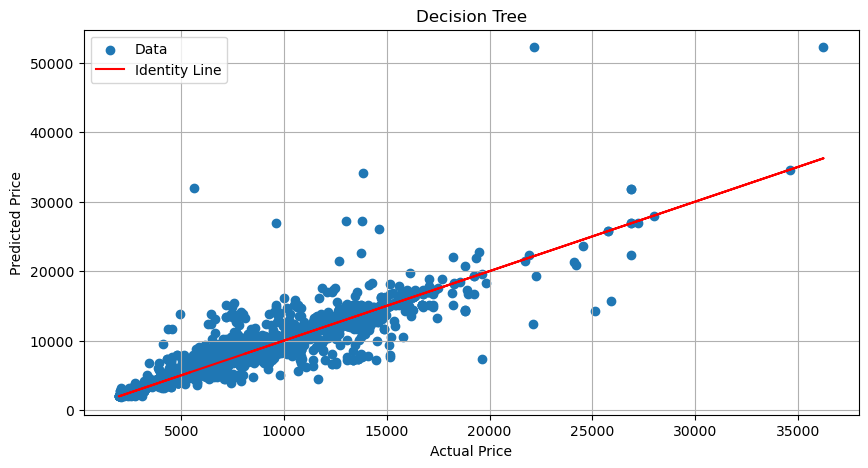

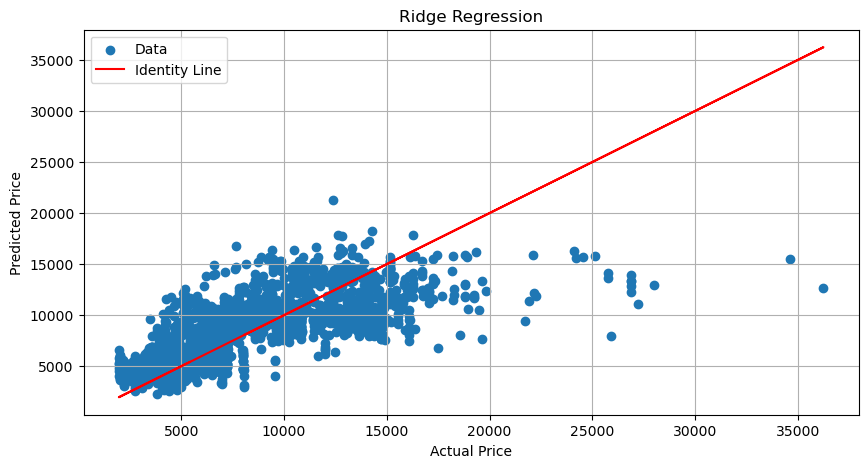

In [76]:
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
def ML_model(X_train,y_train,X_test,y_test):
    
    LR = LinearRegression()
    RF = RandomForestRegressor(n_estimators=1000)
    XGB = XGBRegressor()
    DT = DecisionTreeRegressor(random_state=0)
    RR = Ridge()
    
    LR.fit(X_train, y_train)
    RF.fit(X_train, y_train)
    XGB.fit(X_train, y_train)
    DT.fit(X_train, y_train)
    RR.fit(X_train, y_train)

    predict_LR=LR.predict(X_test)
    predict_RF=RF.predict(X_test)
    predict_XGB=XGB.predict(X_test) 
    predict_DT=DT.predict(X_test)
    predict_RR=RR.predict(X_test)
    
    Result_lr = pd.concat([pd.DataFrame({"y_test":y_test}) ,pd.DataFrame({"predict_LR":predict_LR})], axis = 1)
    Result_rf = pd.concat([pd.DataFrame({"y_test":y_test}) ,pd.DataFrame({"predict_RF":predict_RF})], axis = 1)
    Result_xgb = pd.concat([pd.DataFrame({"y_test":y_test}) ,pd.DataFrame({"predict_XGB":predict_XGB})], axis = 1)
    Result_dt = pd.concat([pd.DataFrame({"y_test":y_test}) ,pd.DataFrame({"predict_DT":predict_DT})], axis = 1)
    Result_rr = pd.concat([pd.DataFrame({"y_test":y_test}) ,pd.DataFrame({"predict_RR":predict_RR})], axis = 1)

    Result_lr.to_csv('LinearRegression.csv')
    Result_rf.to_csv('RF.csv')
    Result_xgb.to_csv('XGB.csv') 
    Result_dt.to_csv('DT.csv')
    Result_rr.to_csv('RR.csv')


    confidence_LR = LR.score(X_test, y_test)
    confidence_RF = RF.score(X_test, y_test)
    confidence_XGB = XGB.score(X_test, y_test)
    confidence_DT = DT.score(X_test, y_test)
    confidence_RR = RR.score(X_test, y_test)
    
    lst1 =["Linear Regression","Random Forest Regressor","XGBoost Regressor","Decision Tree", "Ridge Regression"]
    lst = [predict_LR,predict_RF,predict_XGB,predict_DT,predict_RR]
    for idx, val in enumerate(lst):
        Corr = np.corrcoef(y_test,val)[0][1]
        MSE1 = MSE(y_test, val)
        MAE1 = MAE(y_test, val)
        RMSE = sqrt(MSE1)
        R2 = r2_score(y_test,val)
        
        print("--------------------------")
        print('Corr_{}: {:.3f}' .format(lst1[idx],Corr)) 
        print('MAE_{}:  {:.3f}' .format(lst1[idx],MAE1))
        print('MSE_{}:  {:.3f}' .format(lst1[idx],MSE1))
        print('RMSE_{}: {:.3f}' .format(lst1[idx],RMSE))
        print('R2_{}:   {:.3f}' .format(lst1[idx],R2))
        print("--------------------------")
        
        figure = plt.subplots(figsize=(10,5))
        plt.scatter(y_test,val,label='Data')
        plt.xlabel('Actual Price')
        plt.ylabel('Predicted Price')
        plt.plot(y_test, y_test, color='red',label='Identity Line')
        plt.grid()
        plt.legend(loc='best')
        plt.title('%s' %lst1[idx])

        
    print("*************Confidence********")
    
    print("--------------------------")
    print('confidence_LR:',confidence_LR)
    print("--------------------------")
    print('confidence_RF:',confidence_RF)
    print("--------------------------")
    print('confidence_XGB:',confidence_XGB)
    print("--------------------------")
    print('confidence_DT:',confidence_DT)
    print("--------------------------")
    print('confidence_RR:',confidence_RR)
    print("--------------------------")
    


ML_model(X_train,y_train,X_test,y_test)

# please add the plot i thios section more than two plot with using three section in each part 

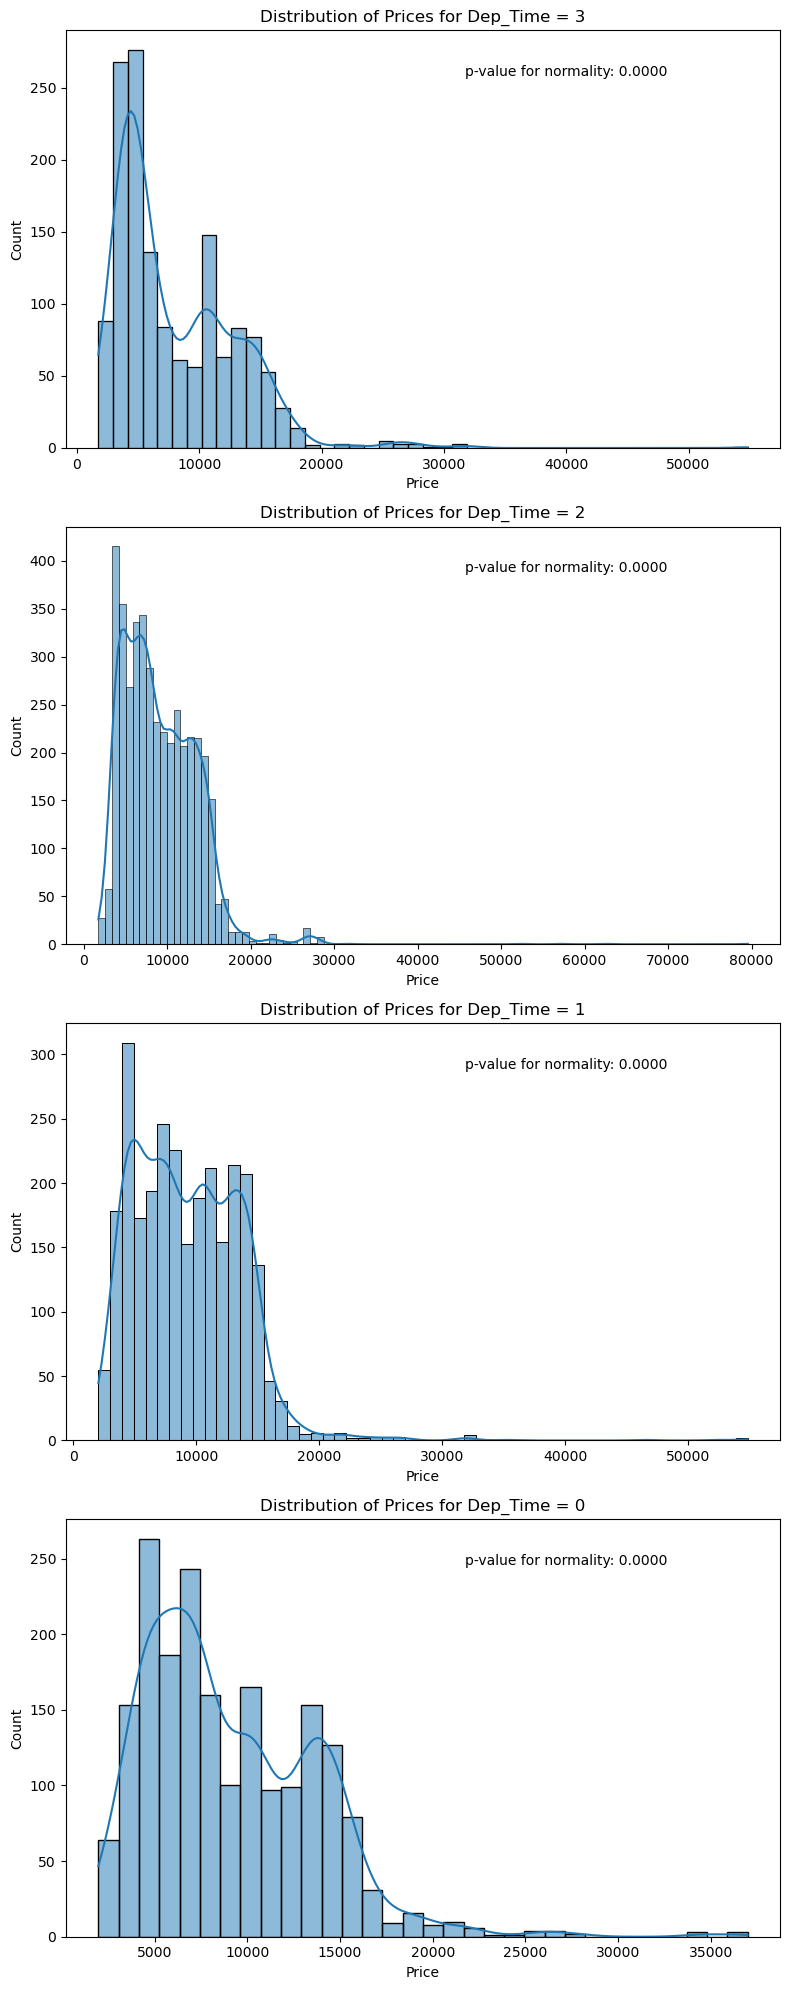

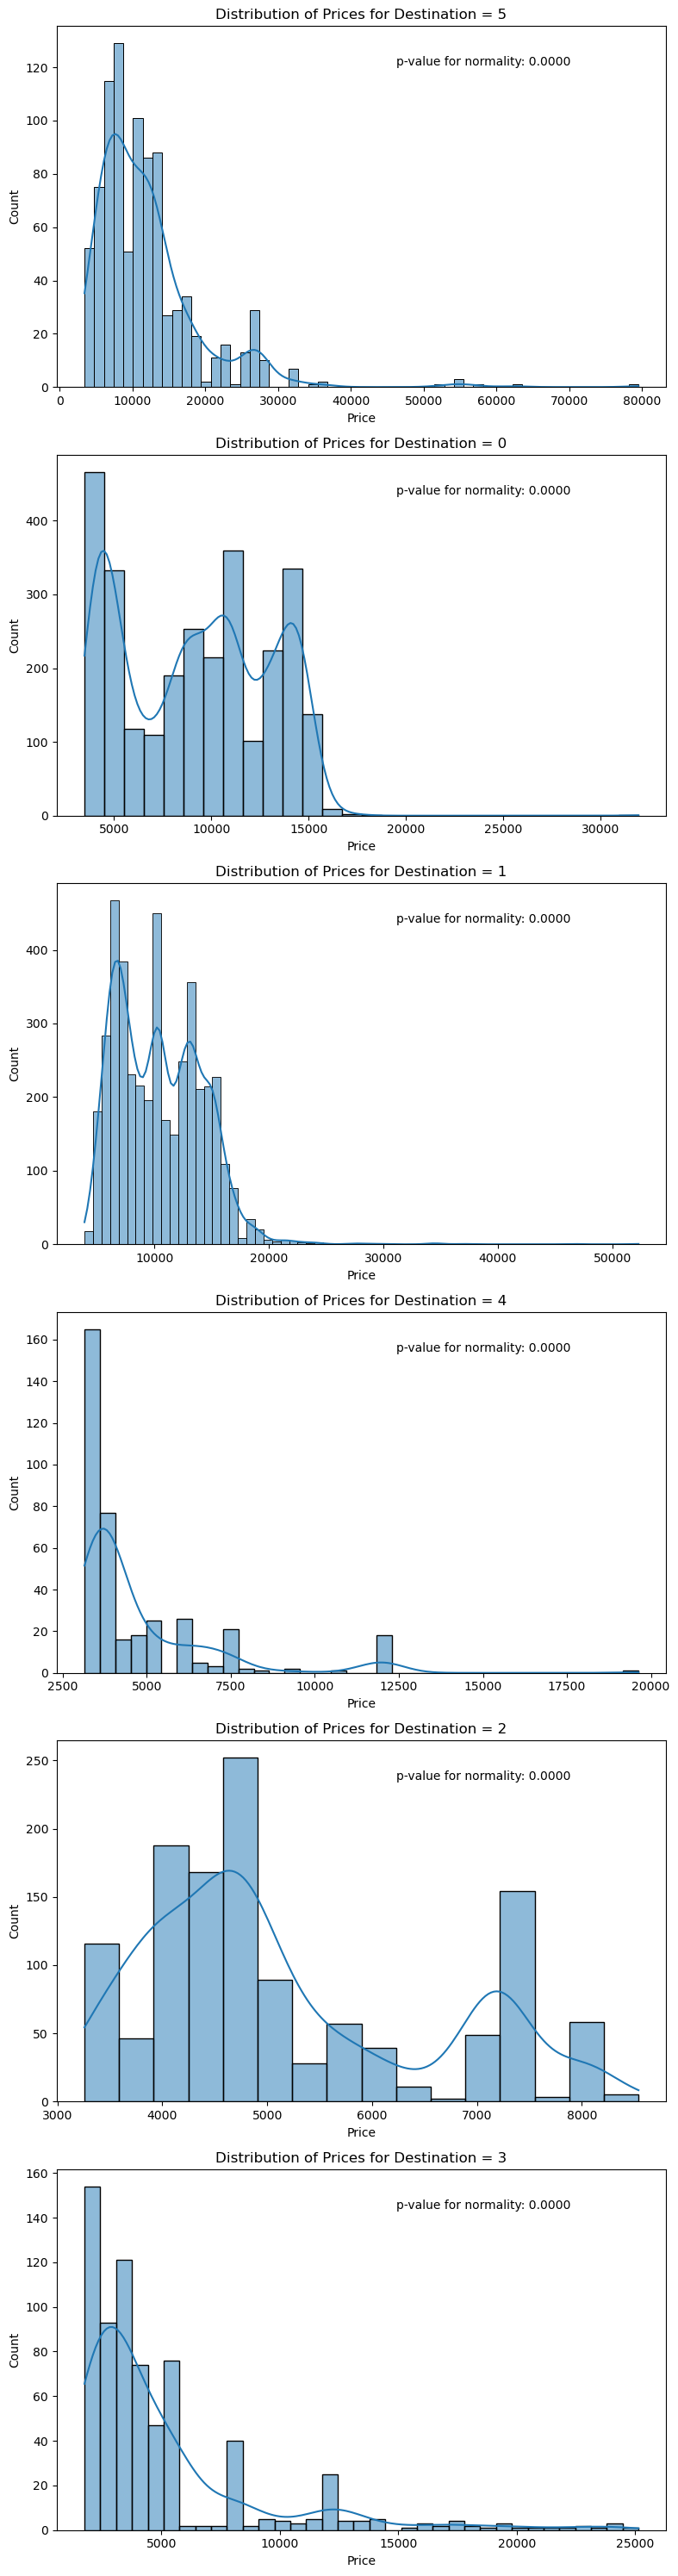

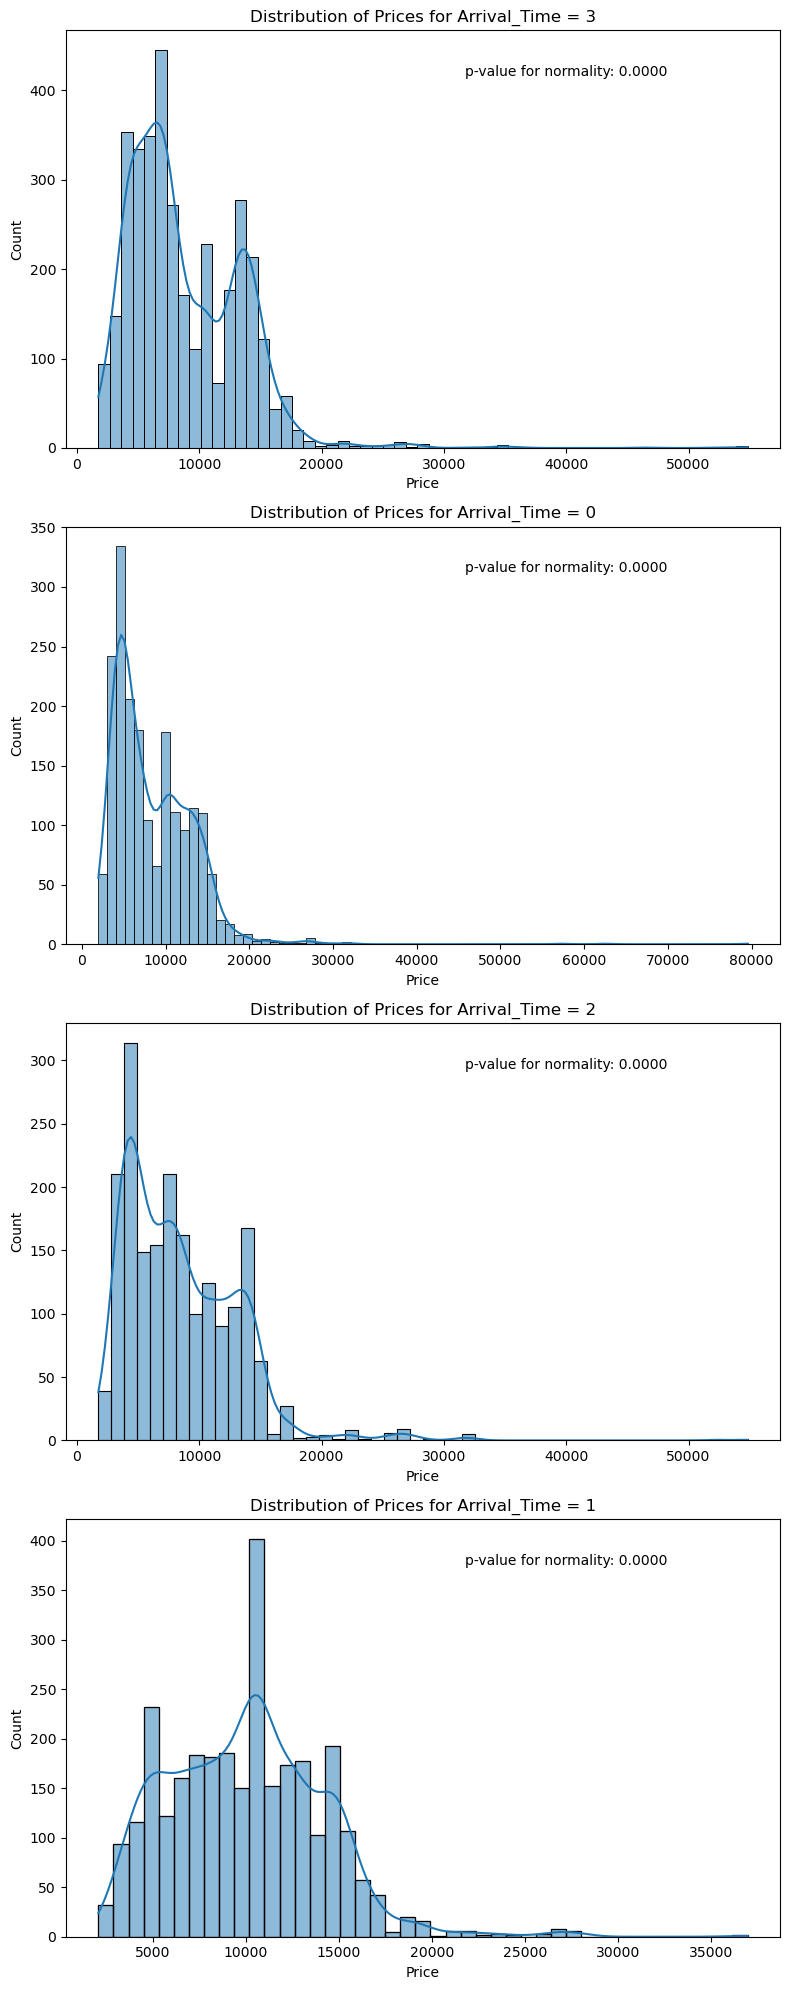

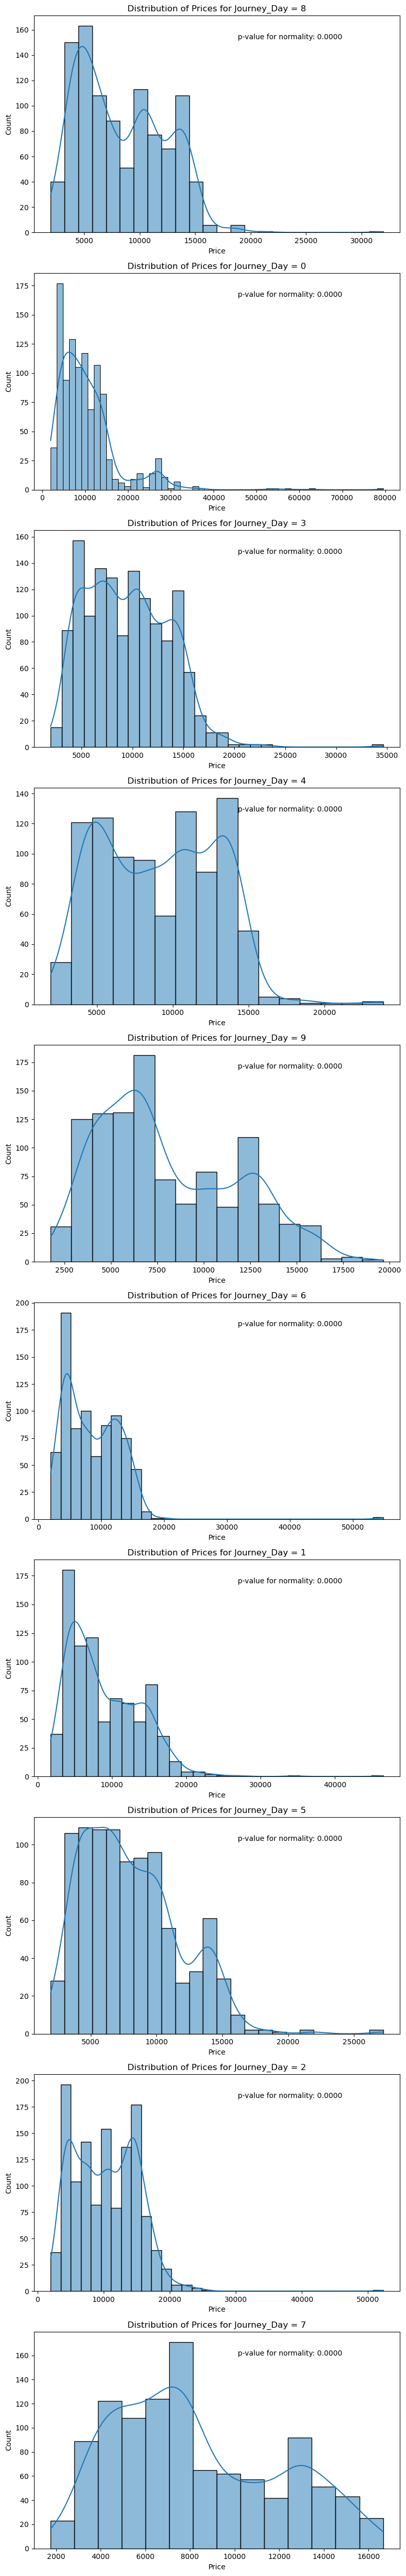

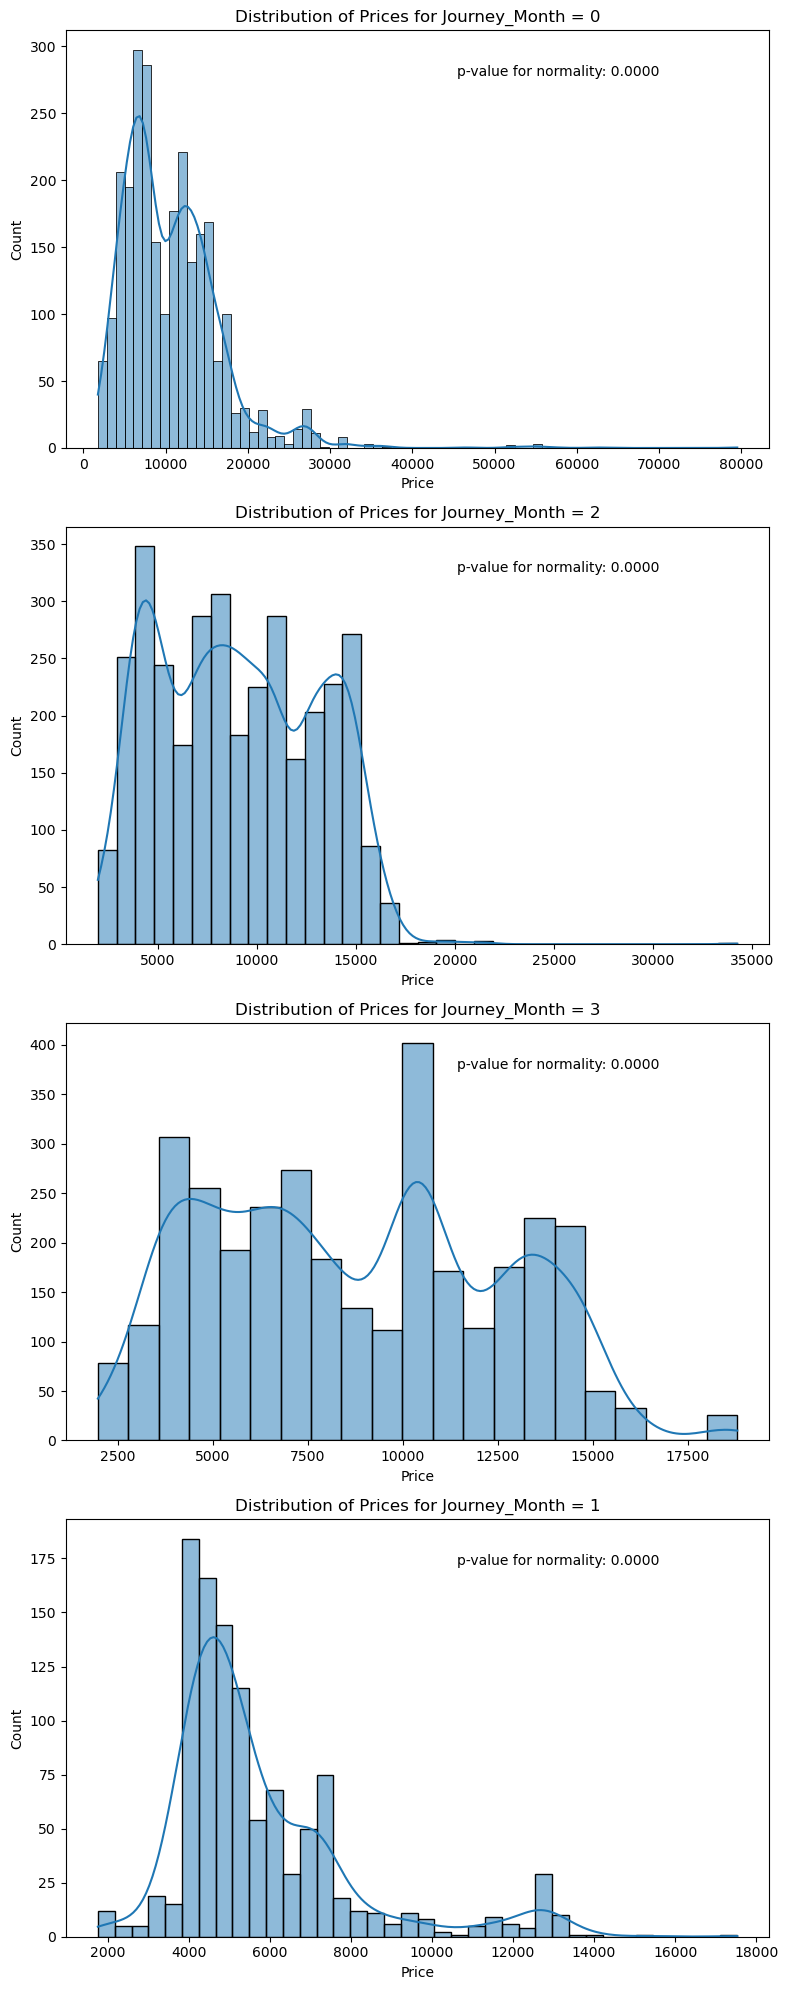

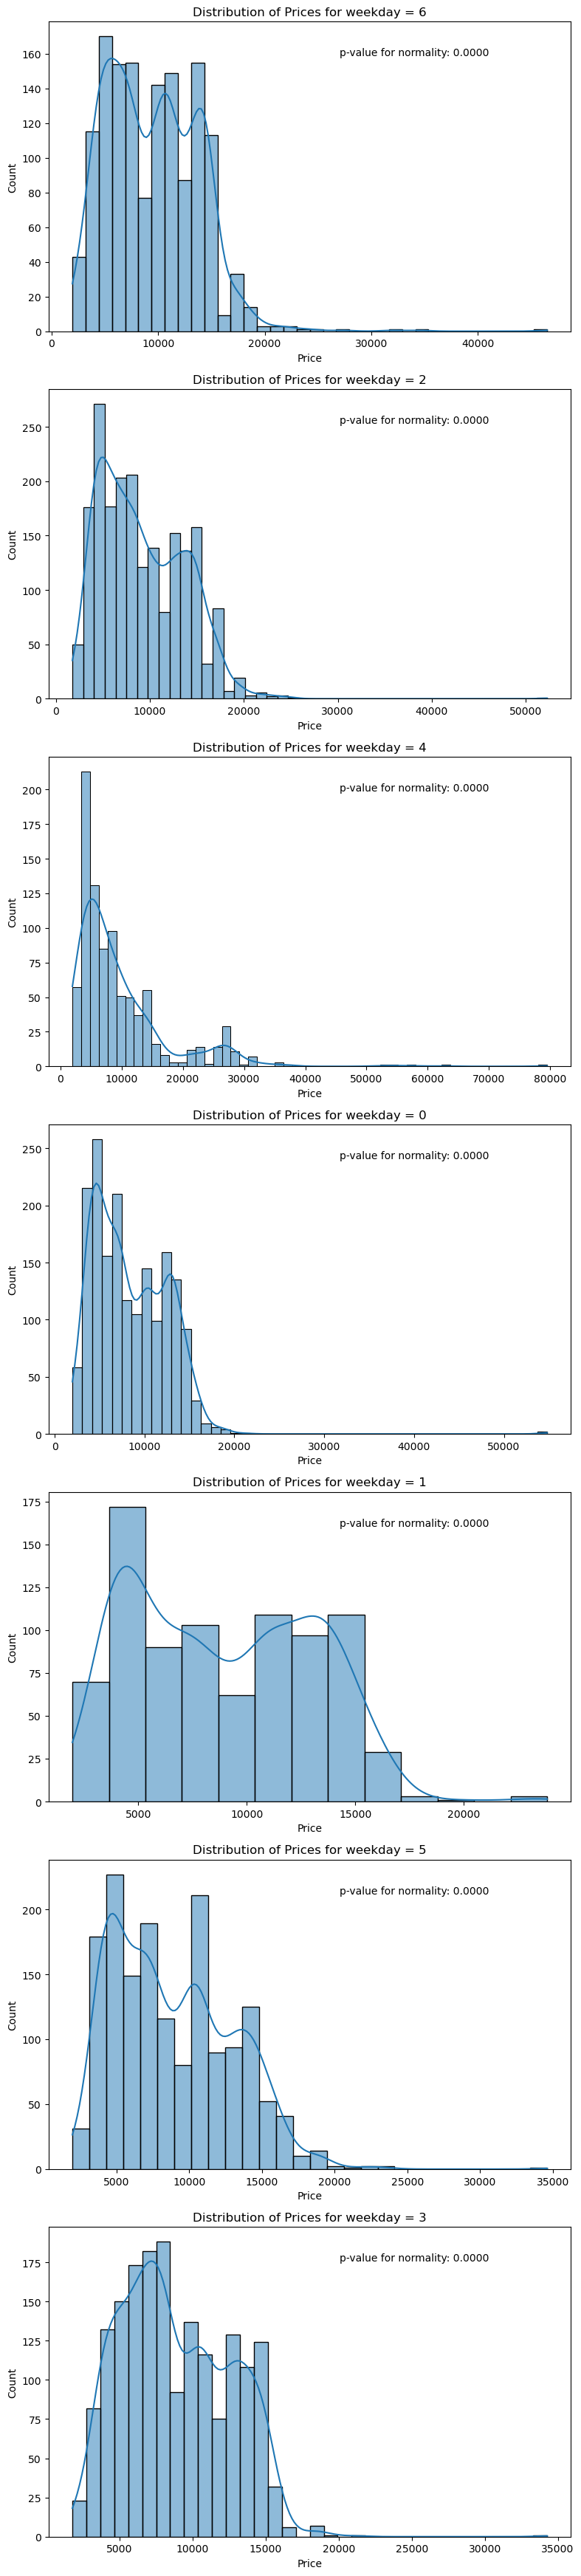

ValueError: Data must be at least length 3.

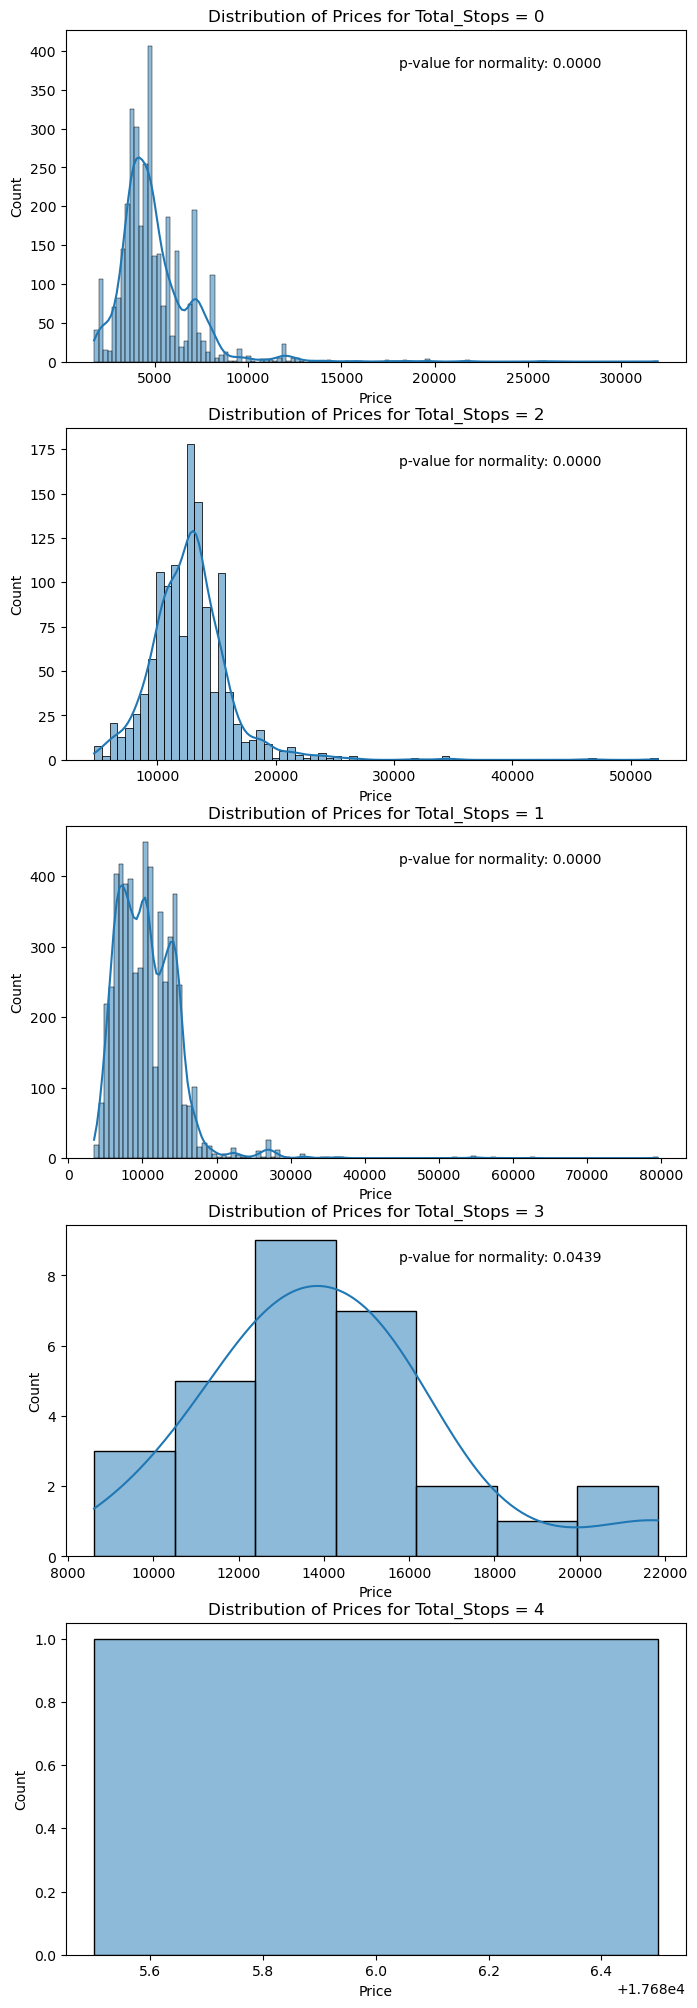

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro

def plot_distribution_and_test_normality(df, group_by=None):
    if group_by:
        groups = df3[group_by].unique()
        fig, axes = plt.subplots(len(groups), 1, figsize=(8, 5 * len(groups)))
        if len(groups) == 1:
            axes = [axes]  
        for ax, group in zip(axes, groups):
            subset = df3[df3[group_by] == group]['Price']
            sns.histplot(subset, kde=True, ax=ax)
            ax.set_title(f'Distribution of Prices for {group_by} = {group}')
            stat, p = shapiro(subset)
            ax.text(s=f'p-value for normality: {p:.4f}', x=0.7, y=0.9, ha='center', va='center', transform=ax.transAxes)
    else:
        sns.histplot(data['Price'], kde=True)
        plt.title('Overall Distribution of Prices')
        stat, p = shapiro(df3['Price'])
        plt.text(s=f'p-value for normality: {p:.4f}', x=0.7, y=0.9, ha='center', va='center', transform=plt.gca().transAxes)

    plt.tight_layout()
    plt.show()

plot_distribution_and_test_normality(df3, 'Dep_Time')
plot_distribution_and_test_normality(df3, 'Destination')
plot_distribution_and_test_normality(df3, 'Arrival_Time')
plot_distribution_and_test_normality(df3, 'Journey_Day')
plot_distribution_and_test_normality(df3, 'Journey_Month')
plot_distribution_and_test_normality(df3, 'weekday')
plot_distribution_and_test_normality(df3, 'Total_Stops')


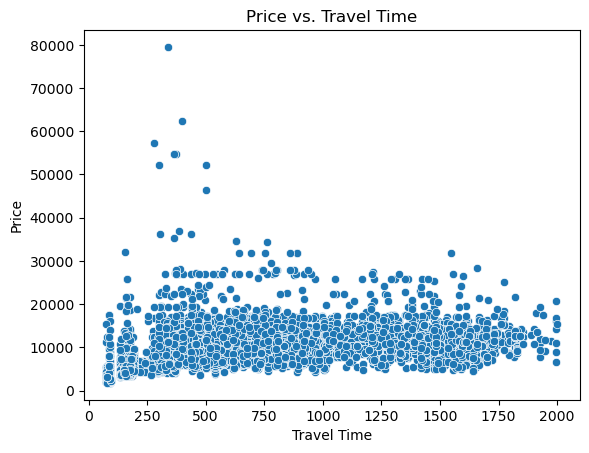

In [78]:
sns.scatterplot(x='Duration', y='Price', data=df)
plt.xlabel('Travel Time')
plt.ylabel('Price')
plt.title('Price vs. Travel Time')
plt.show()

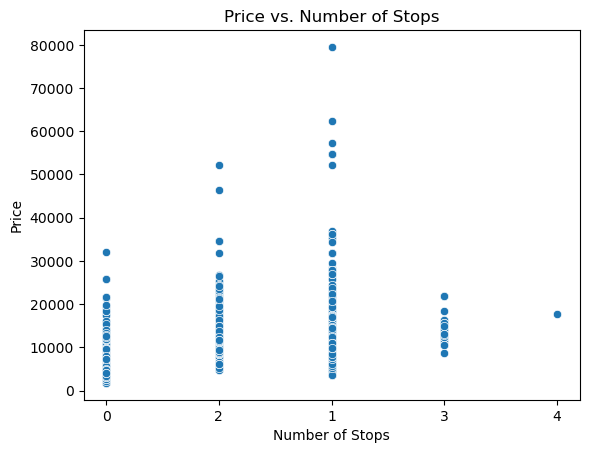

In [79]:
sns.scatterplot(x='Total_Stops', y='Price', data=df)
plt.xlabel('Number of Stops')
plt.ylabel('Price')
plt.title('Price vs. Number of Stops')
plt.show()

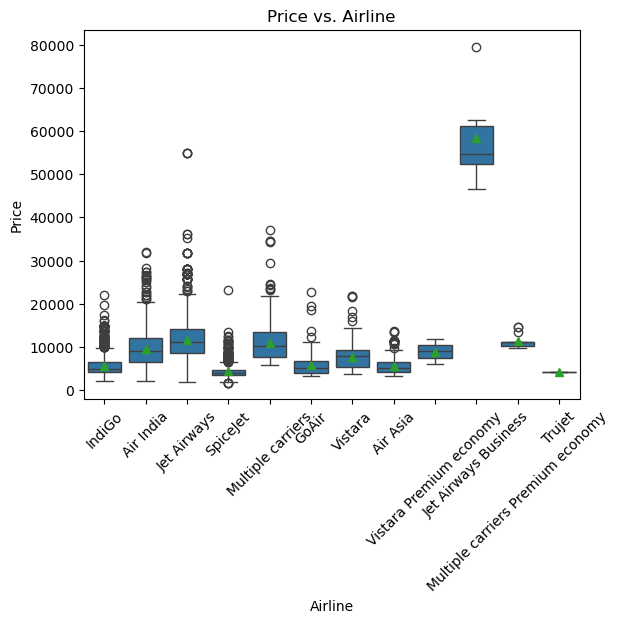

In [80]:
sns.boxplot(x='Airline', y='Price', showmeans=True, data=df)
plt.xlabel('Airline')
plt.ylabel('Price')
plt.title('Price vs. Airline')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

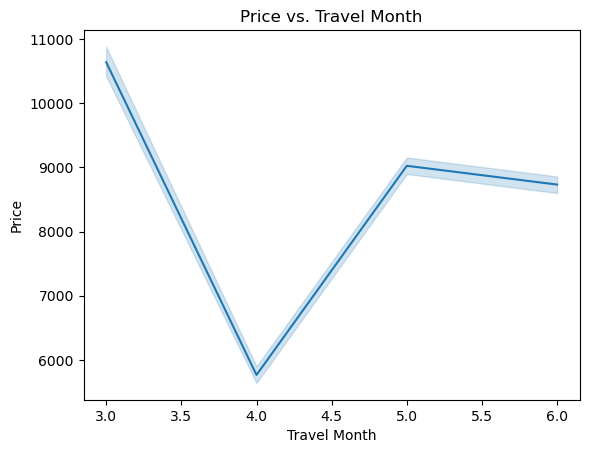

In [81]:
sns.lineplot(x='Journey_Month', y='Price', data=df)
plt.xlabel('Travel Month')
plt.ylabel('Price')
plt.title('Price vs. Travel Month')
plt.show()

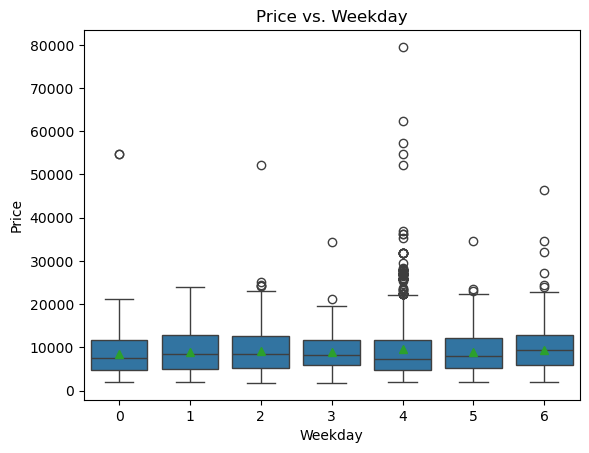

In [82]:
sns.boxplot(x='weekday', y='Price', showmeans=True, data=df)
plt.xlabel('Weekday')
plt.ylabel('Price')
plt.title('Price vs. Weekday')
plt.show()

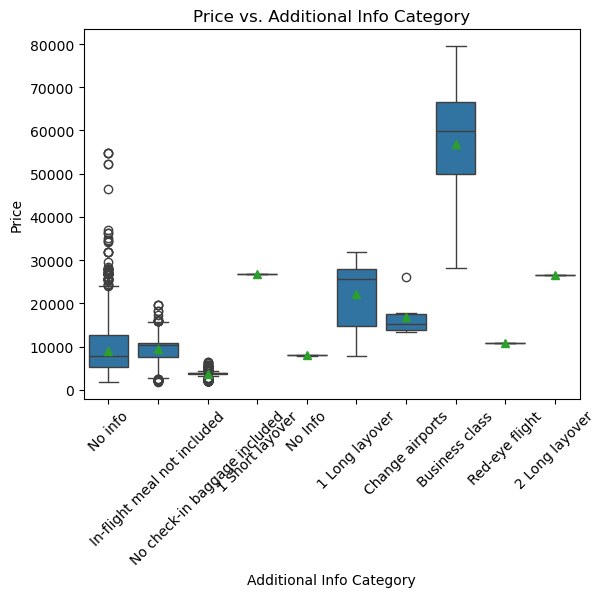

In [83]:
sns.boxplot(x='Additional_Info', y='Price', showmeans=True, data=df)
plt.xlabel('Additional Info Category')
plt.ylabel('Price')
plt.title('Price vs. Additional Info Category')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

[Text(0, 0, 'No info'),
 Text(1, 0, 'In-flight meal not included'),
 Text(2, 0, 'No check-in baggage included'),
 Text(3, 0, '1 Short layover'),
 Text(4, 0, 'No Info'),
 Text(5, 0, '1 Long layover'),
 Text(6, 0, 'Change airports'),
 Text(7, 0, 'Business class'),
 Text(8, 0, 'Red-eye flight'),
 Text(9, 0, '2 Long layover')]

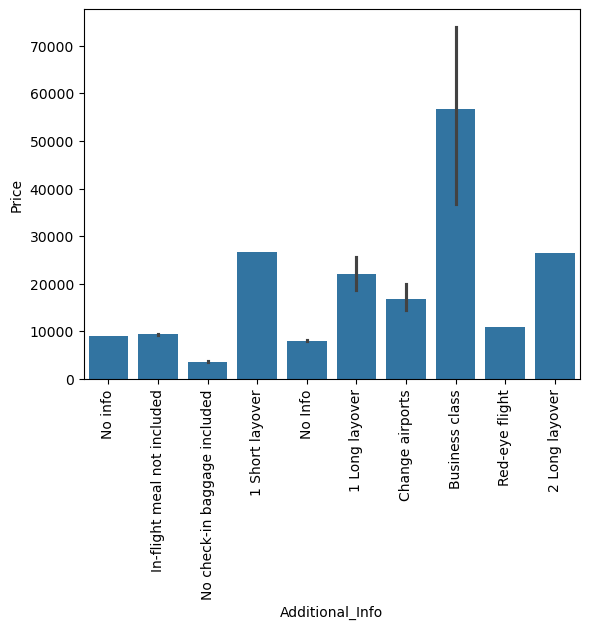

In [84]:
#Deptarure time v/s AveragePrice
v2=sns.barplot(x='Additional_Info', y='Price', data=df)
v2.set_ylabel('Price')
v2.set_xlabel('Additional_Info')
v2.set_xticklabels(v2.get_xticklabels(), rotation=90)

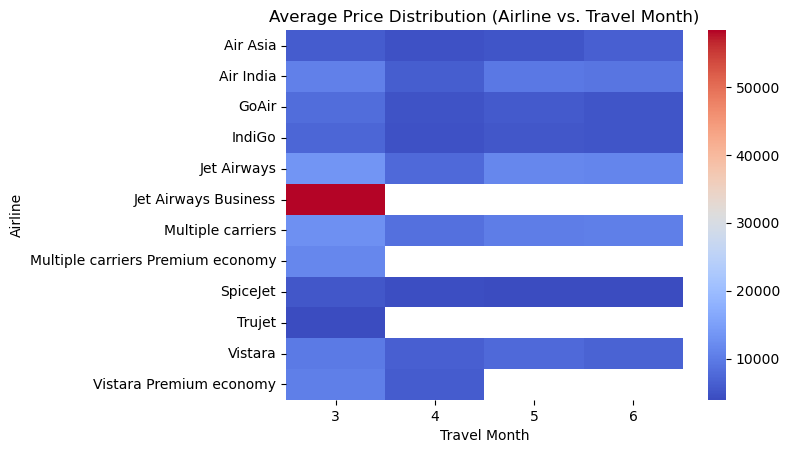

In [85]:
price_pivot = df.pivot_table(values='Price', index='Airline', columns='Journey_Month', aggfunc=np.mean)
sns.heatmap(price_pivot, cmap='coolwarm')  # Adjust 'coolwarm' for preferred color scheme
plt.xlabel('Travel Month')
plt.ylabel('Airline')
plt.title('Average Price Distribution (Airline vs. Travel Month)')
plt.show()

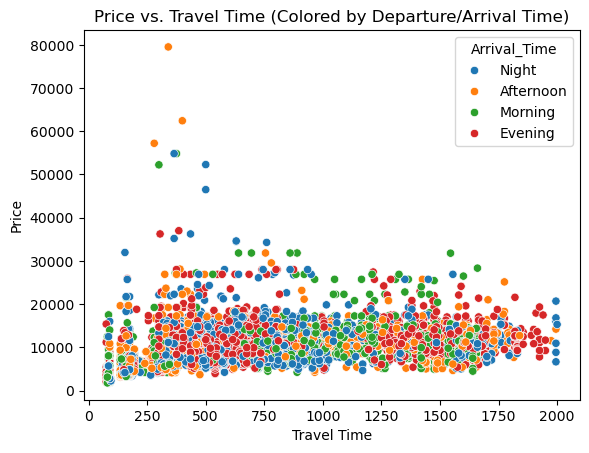

In [86]:
sns.scatterplot(x='Duration', y='Price', hue='Arrival_Time', data=df)
plt.xlabel('Travel Time')
plt.ylabel('Price')
plt.title('Price vs. Travel Time (Colored by Departure/Arrival Time)')
plt.show()


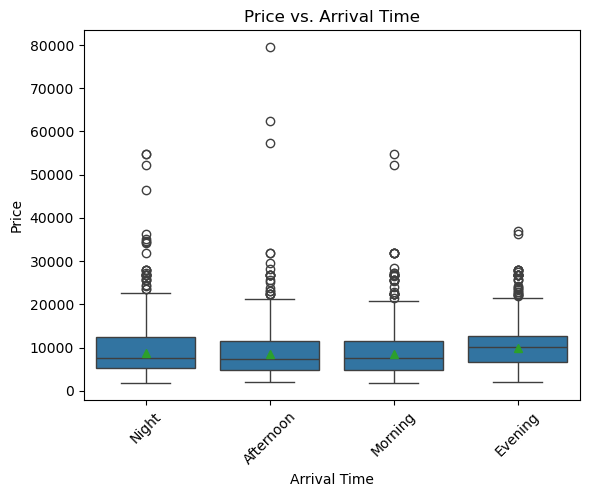

In [87]:
sns.boxplot(x='Arrival_Time', y='Price', showmeans=True, data=df)
plt.xlabel('Arrival Time')
plt.ylabel('Price')
plt.title('Price vs. Arrival Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

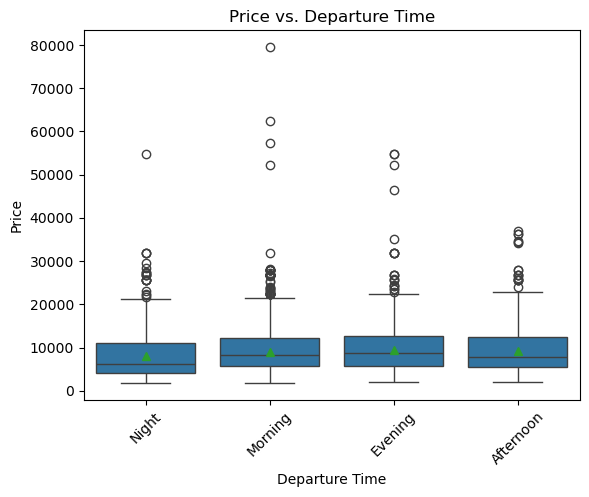

In [88]:
sns.boxplot(x='Dep_Time', y='Price', showmeans=True, data=df)
plt.xlabel('Departure Time')
plt.ylabel('Price')
plt.title('Price vs. Departure Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
df